# Link Analysis
Conducting a link analysis of a network graph involves identifying and analyzing the link within the graph. 

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import os


from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_tokens = pd.read_csv("../data/final_token_selection.csv")


In [2]:
import sys
sys.path.append('..') 

from src.analysis.link_analysis import * 
from src.visualisations.link_analysis_visualisations import * 

## Create dataframes for each metrics

In [3]:
# Specify the path to the file containing the saved cliques data
links_data_path = join(path, '../output/links/metrics/links_data_5e-06.pkl') # load reference value
links_data = LinkData(links_data_path)


# Use the metric_names attribute from CliquesData
metric_names = links_data.metric_names


# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {'sample': {},'sample_population': {},'pvalues': {}, 'sample_directional':{}, 'sample_population_directional':{}, 'pvalues_directional':{}}

# Create DataFrames for each metric
for group in ['sample', 'sample_population', 'pvalues', 'sample_directional', 'sample_population_directional', 'pvalues_directional']:
    for metric_name in metric_names:
        metric_dataframes[group][metric_name] = links_data.get_metric_data(group, metric_name)
        

## Figure Generation

### Fig: Size of Clique 

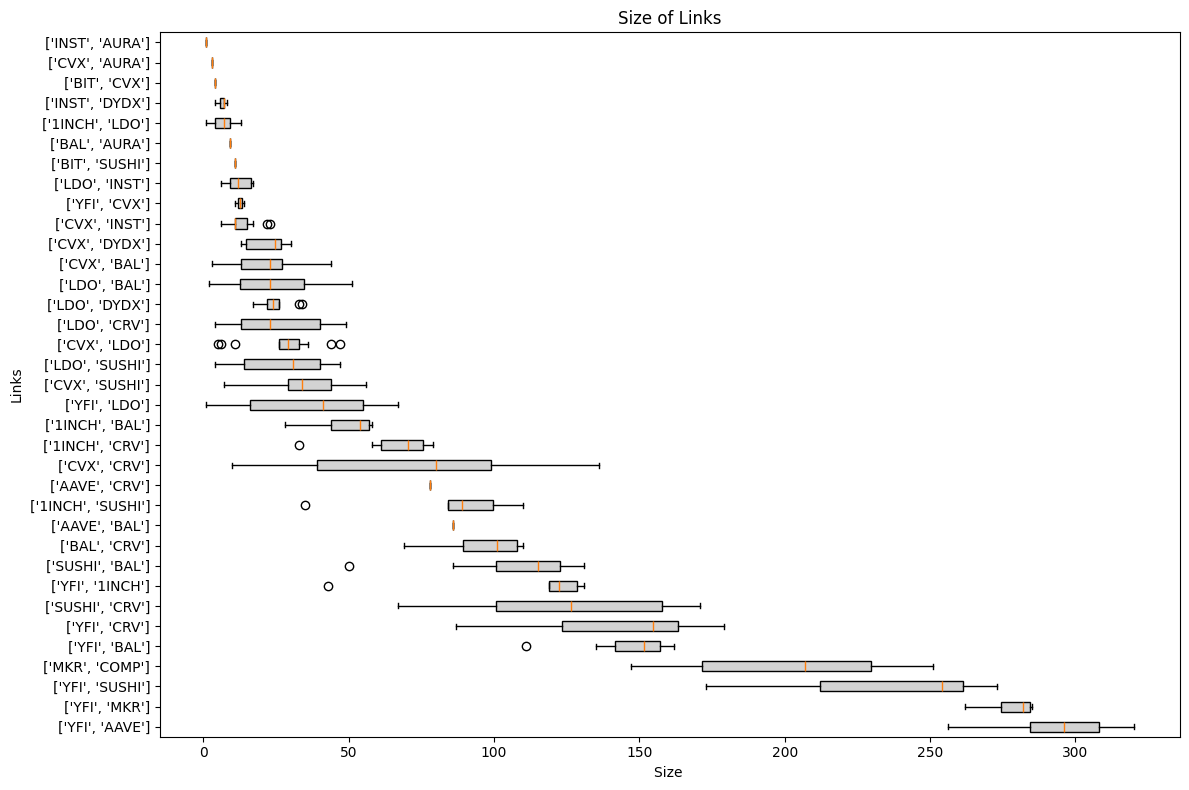

<Figure size 640x480 with 0 Axes>

In [4]:
plot_boxplot(metric_dataframes, metric='size', unit='', group='sample', output_path="../output/links/",custom_index='size', save=True, show=True)


### Fig: link growth over time 

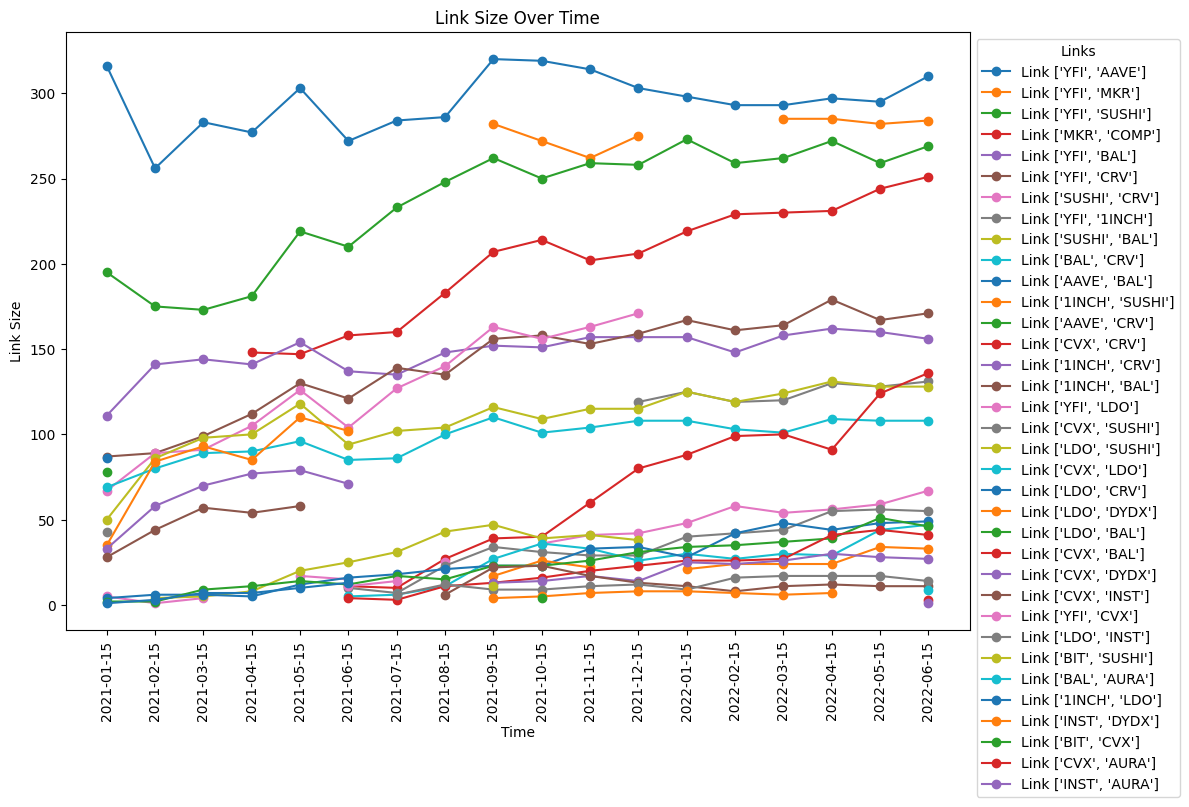

In [5]:
plot_link_growth_over_time(metric_dataframes, group='sample', output_path="../output/links/", save=True, show=True)

### Fig: Scatter  

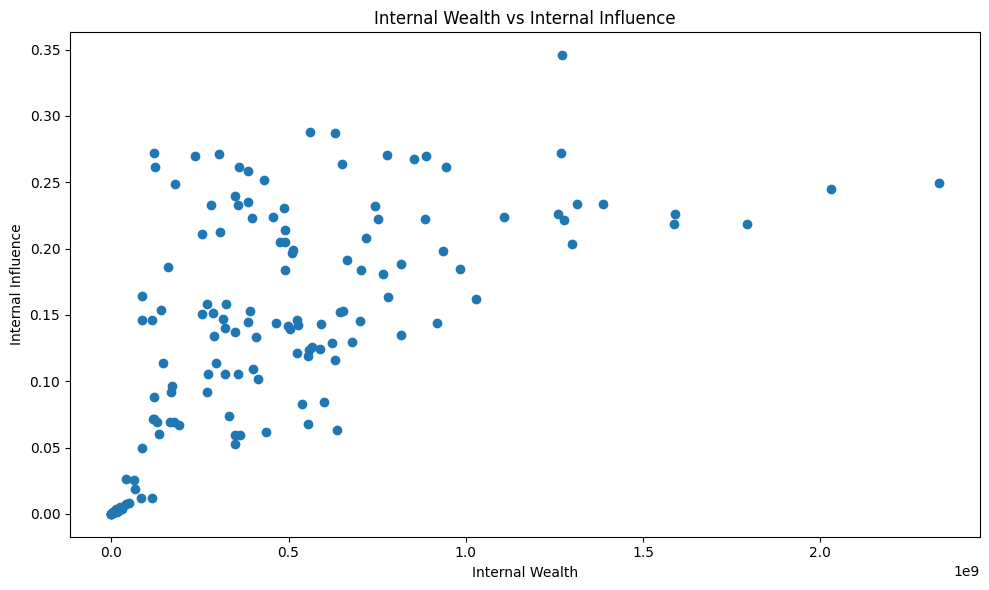

In [6]:
plot_scatter_metrics(metric_dataframes, 'internal_wealth', 'internal_influence', save=False)


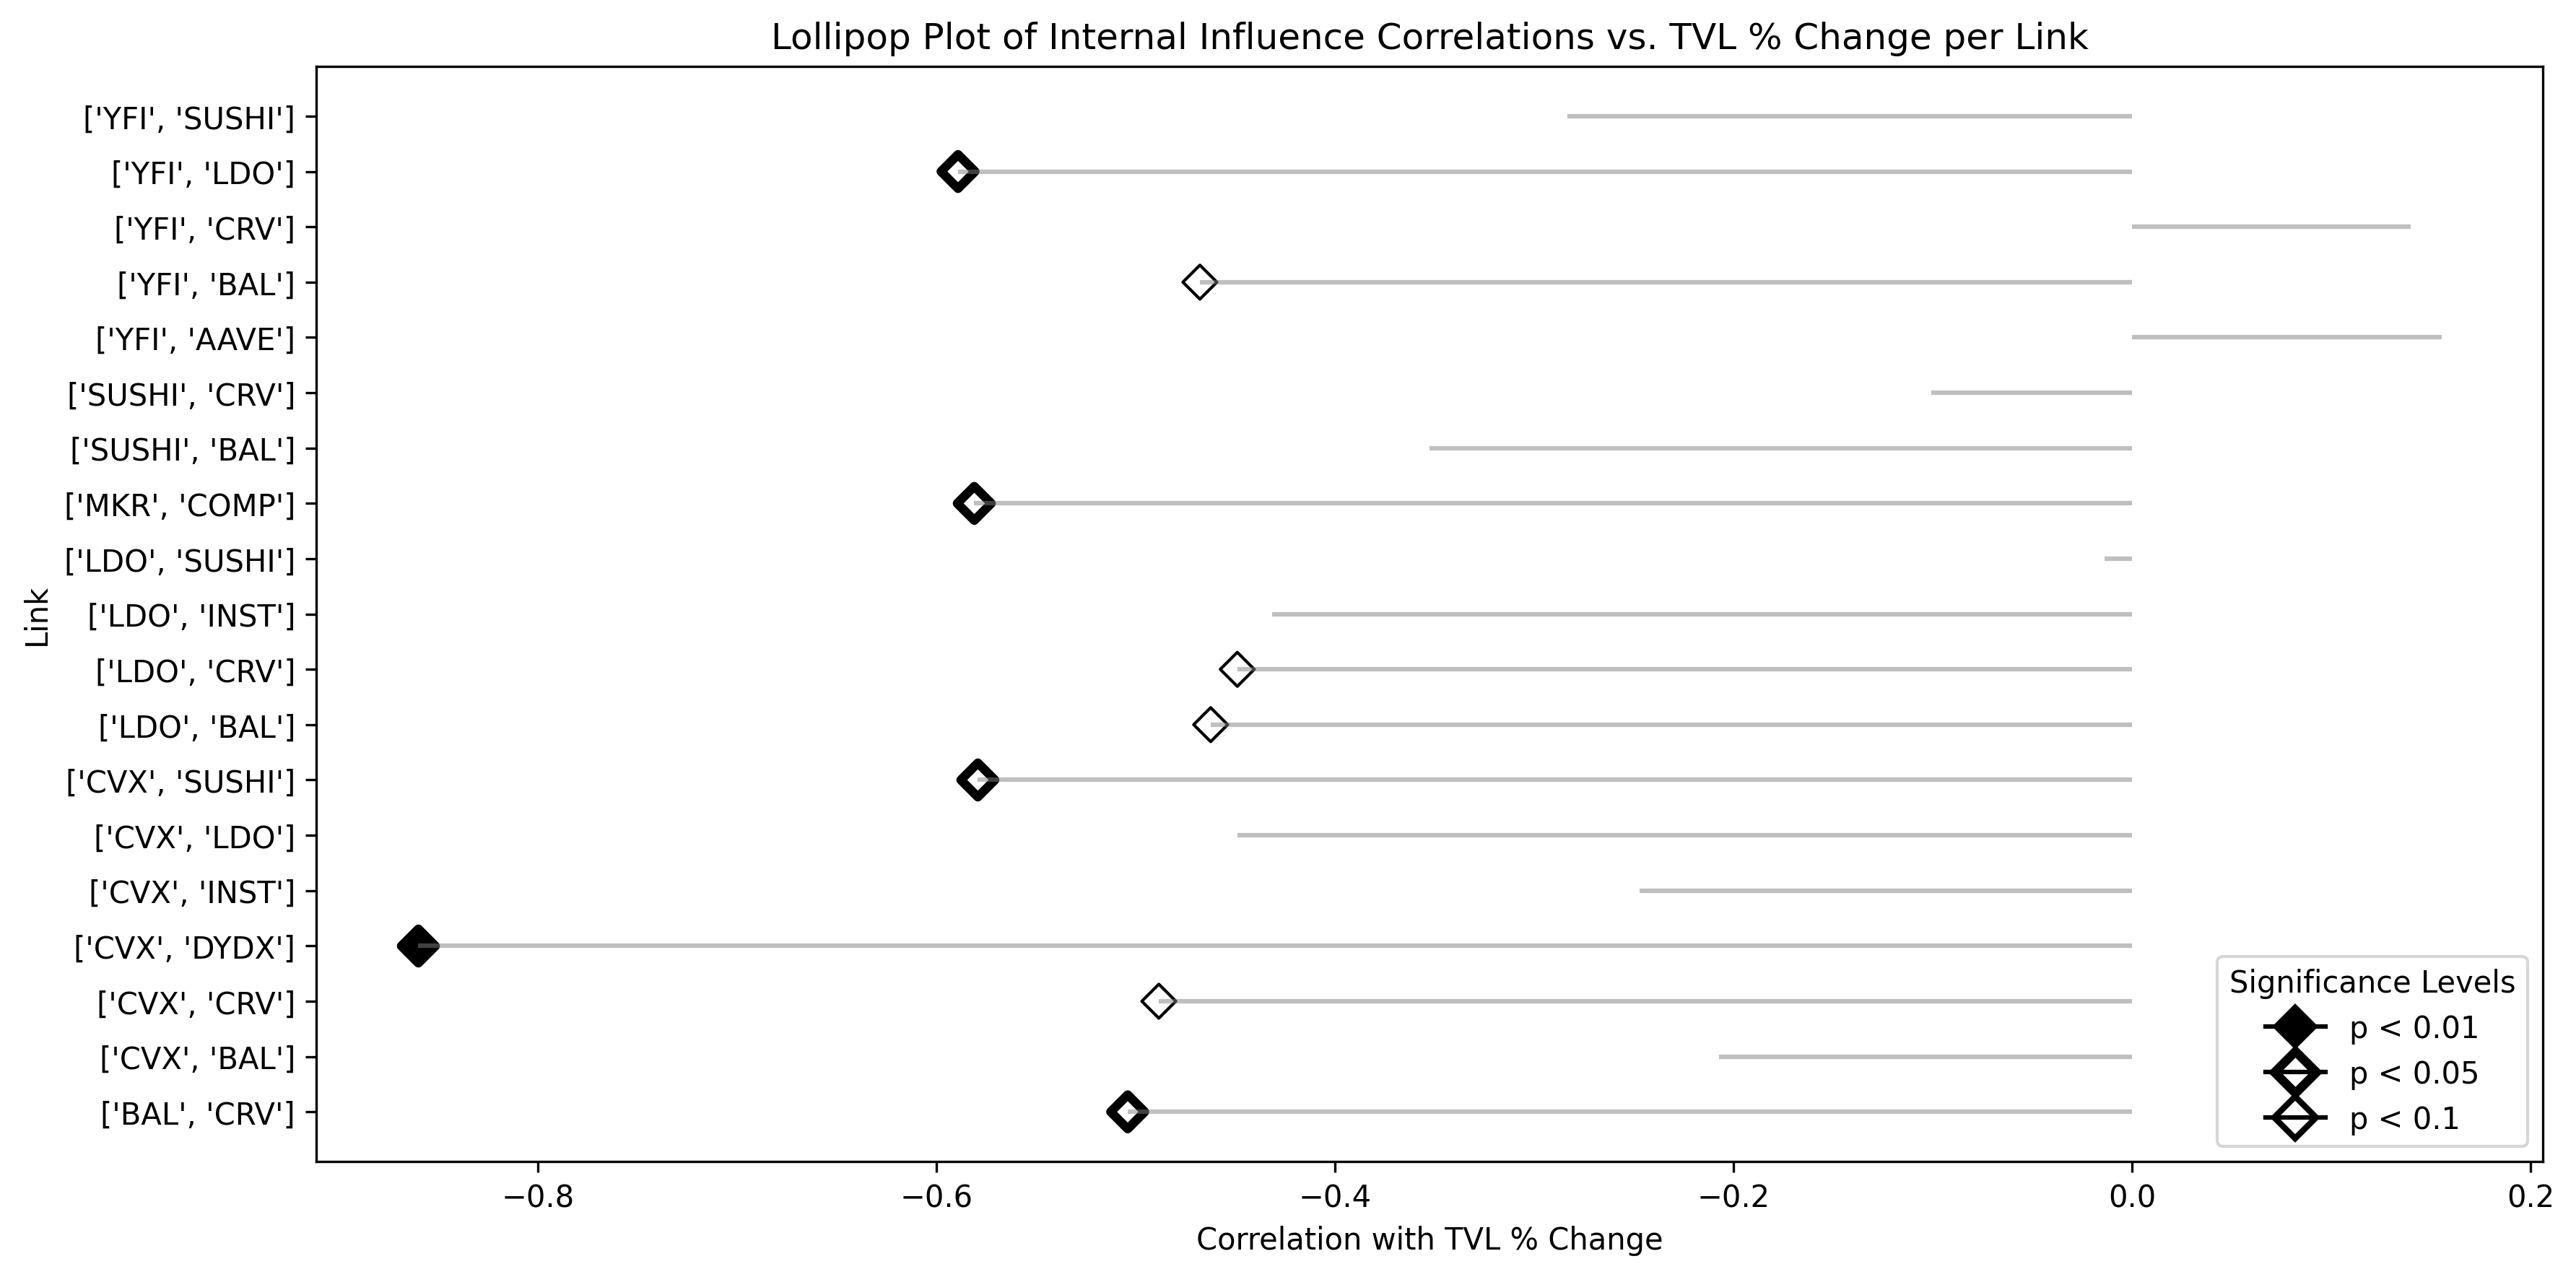

In [33]:
plot_lollipop_correlation_vs_tvl(metric_dataframes, metric='internal_influence', min_occurrences=9, output_path='../output/links', tvl_data_path='../data/tvl.json', save=True, show=True)


### Fig: total_influence

In [21]:
# Example call to the function
# plot_monthly_tvl(metric_dataframes, tvl_data_path='../data/tvl.json', save=True, show=True)

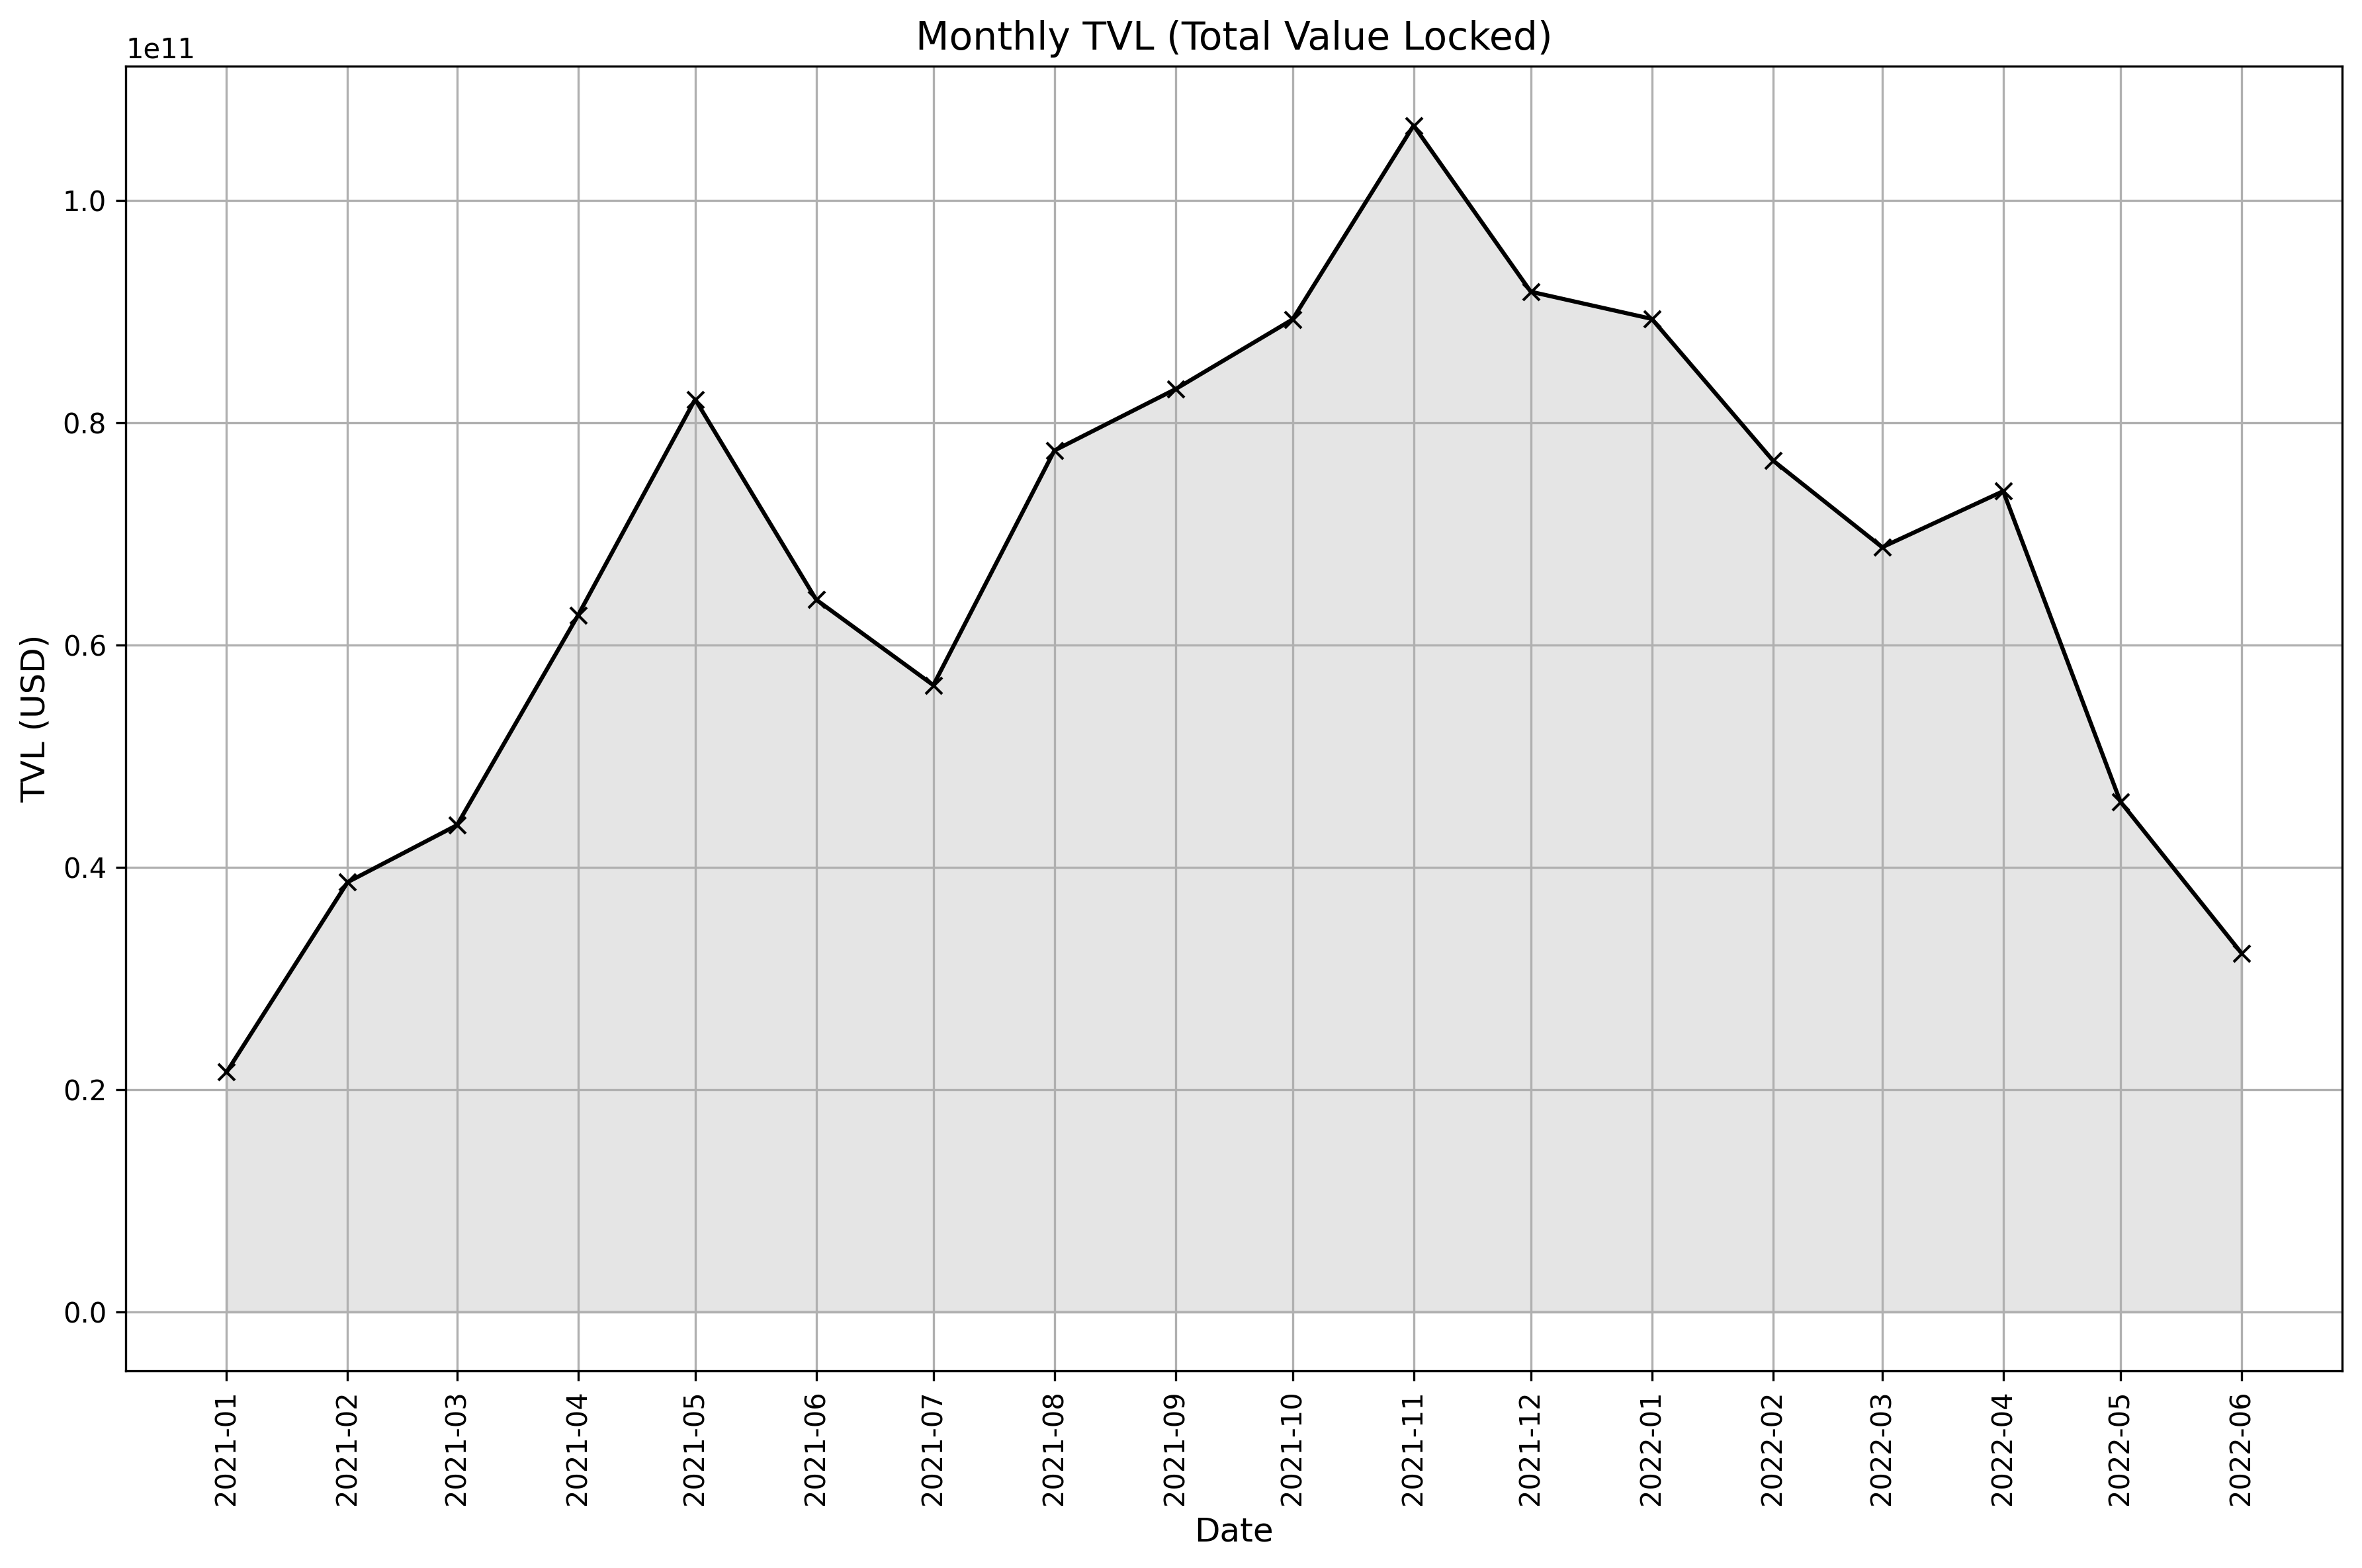

In [22]:
# Example call to the function
plot_monthly_tvl(metric_dataframes, tvl_data_path='../data/tvl.json', save=True, show=True)


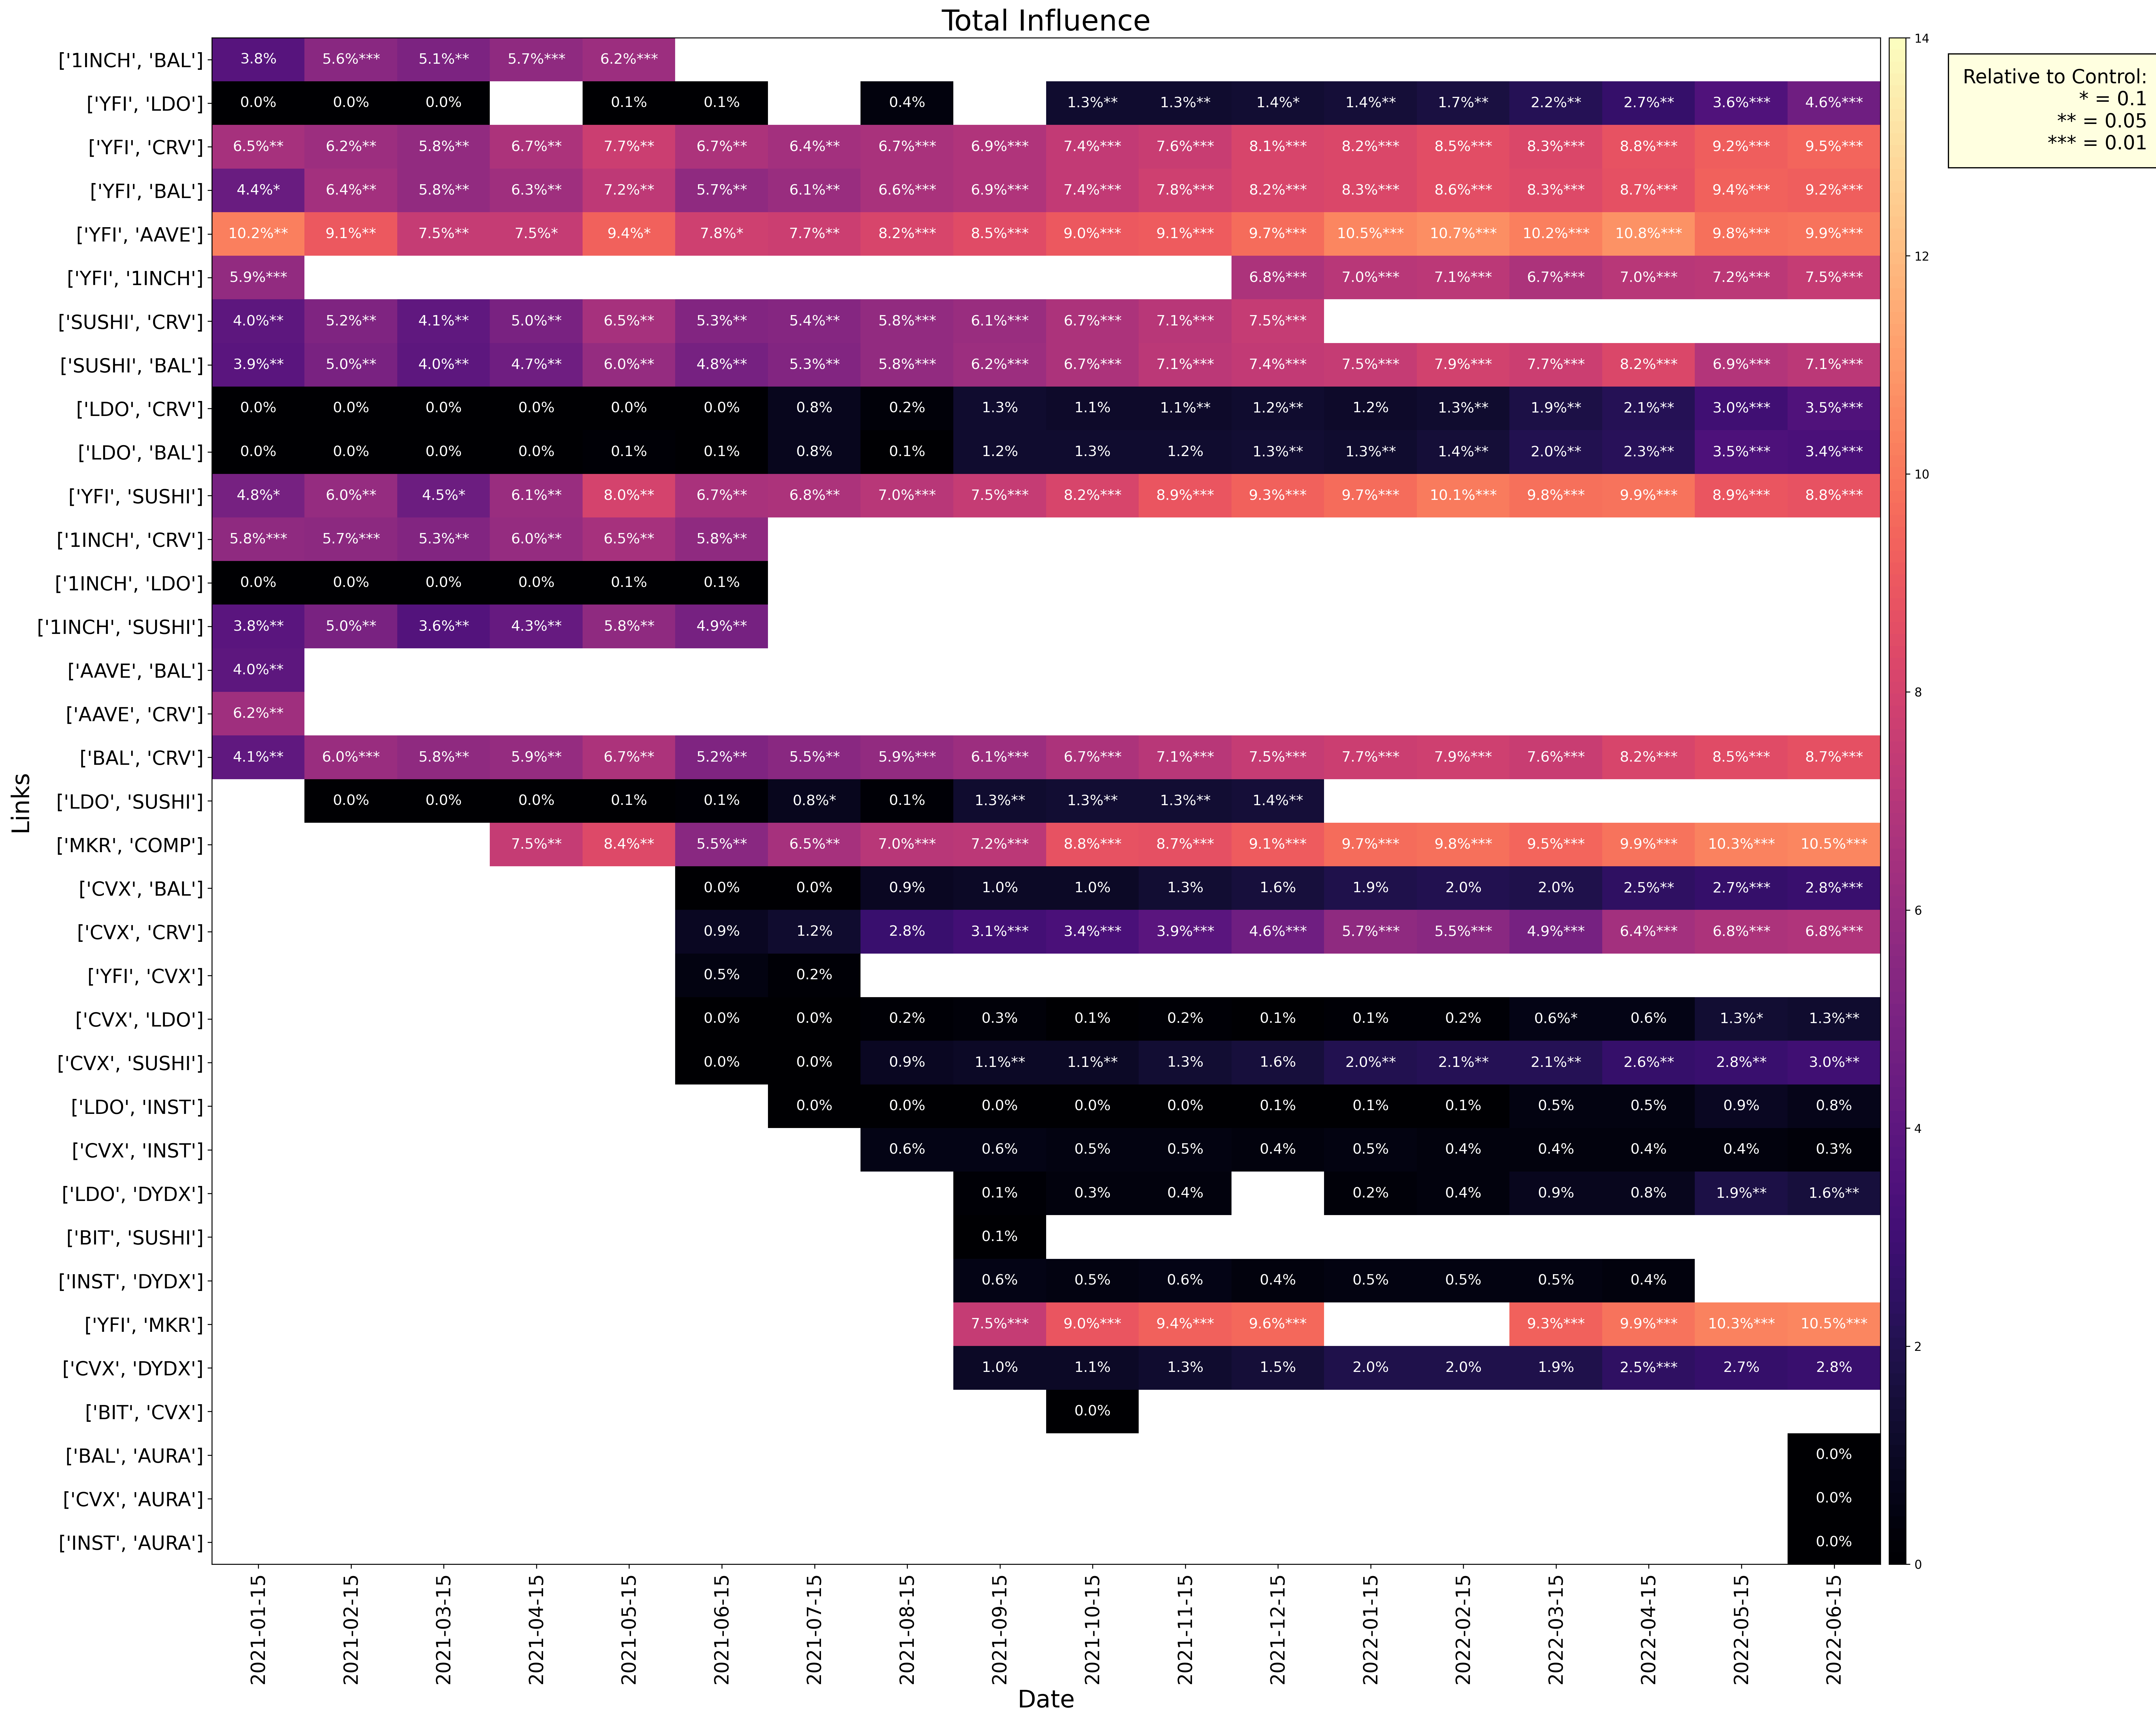

In [36]:
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True,  log=False, output_path="../output/links/", save=True, show=True)

### Fig: gini_total_influence

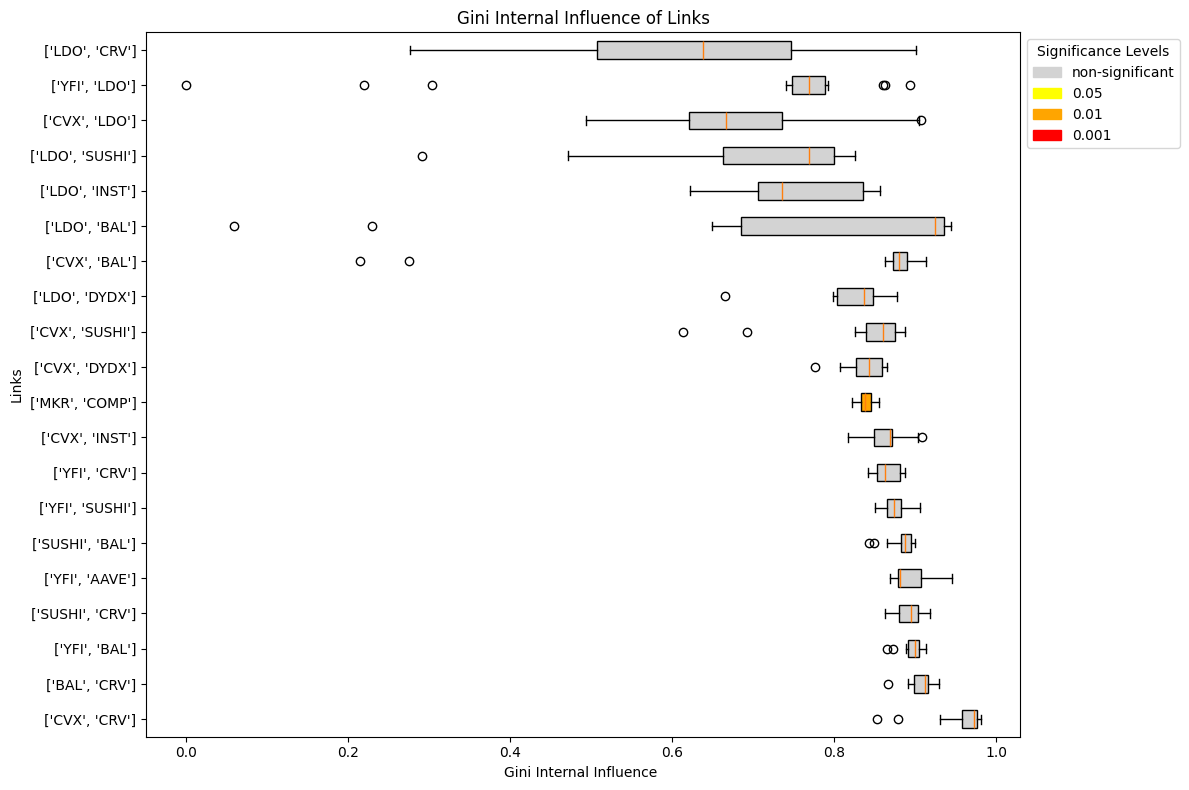

<Figure size 640x480 with 0 Axes>

In [10]:
plot_boxplot(metric_dataframes, metric='gini_internal_influence', unit='', group='sample', pval_group='pvalues', output_path="../output/links/", custom_index='', min_occurrences=9, significance=True, save=True, show=True)

### Fig: internal_influence 

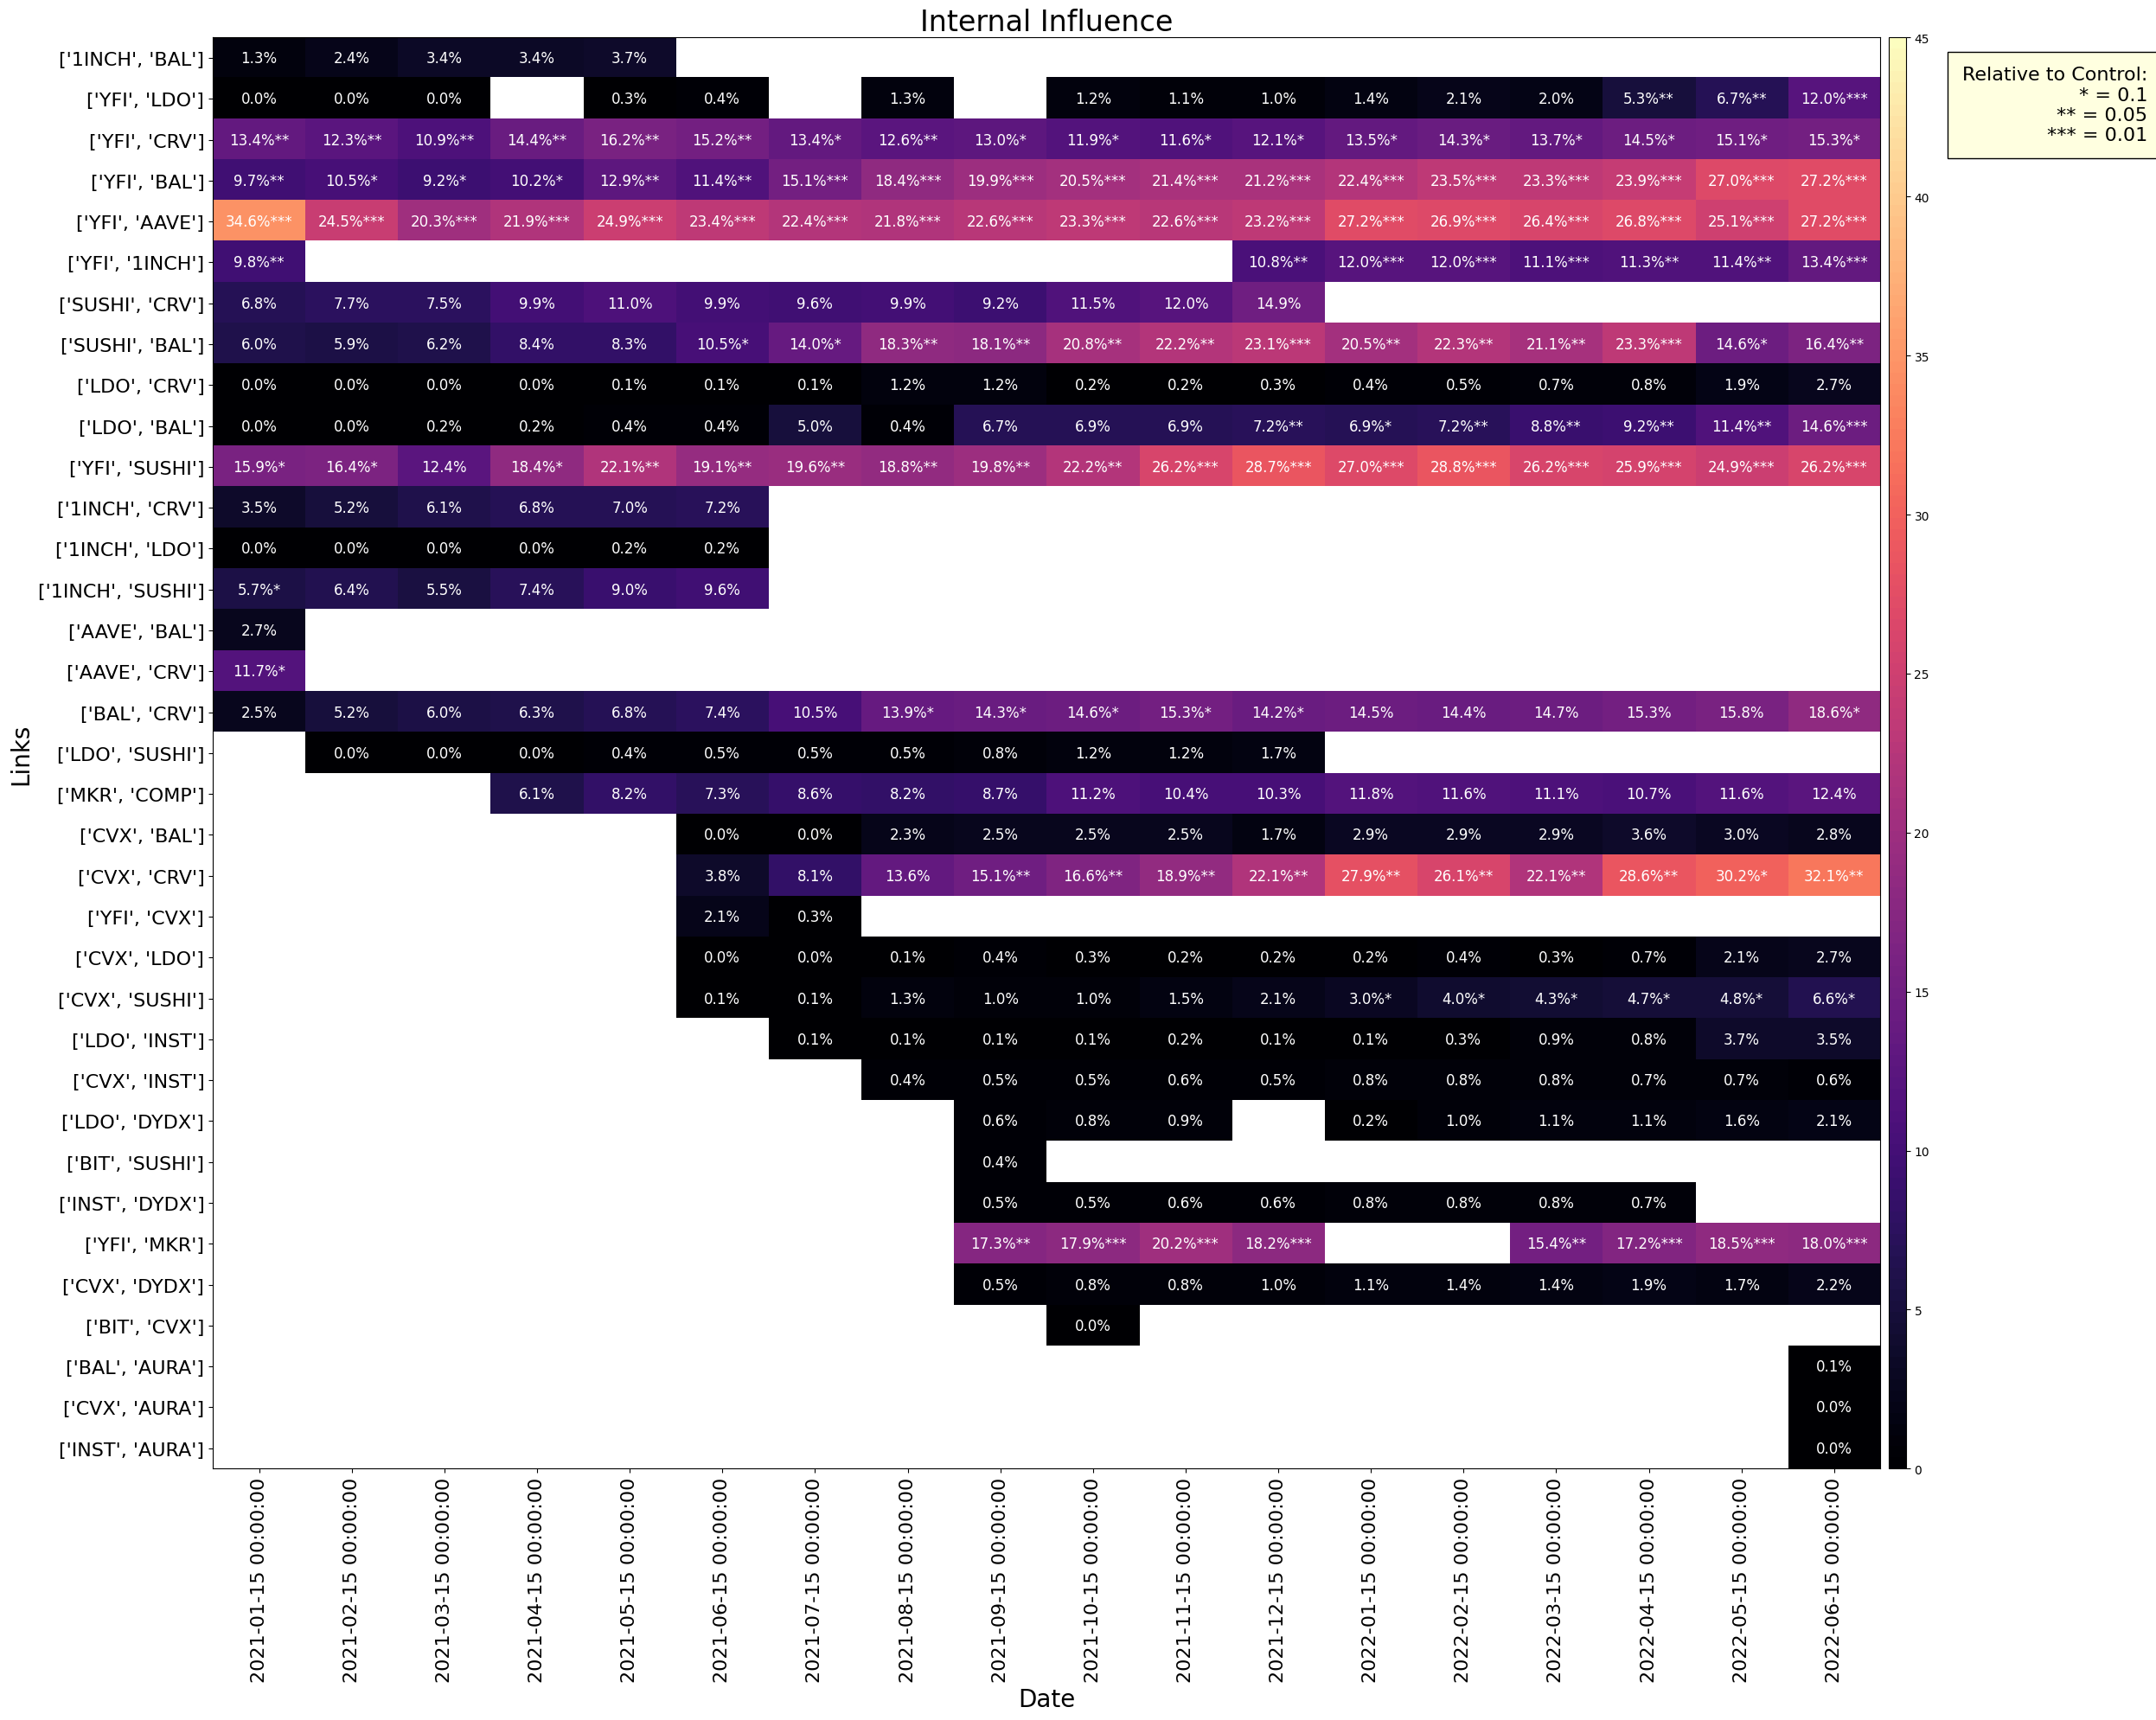

In [11]:
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True,  log=False, output_path="../output/links/", save=True, show=True)

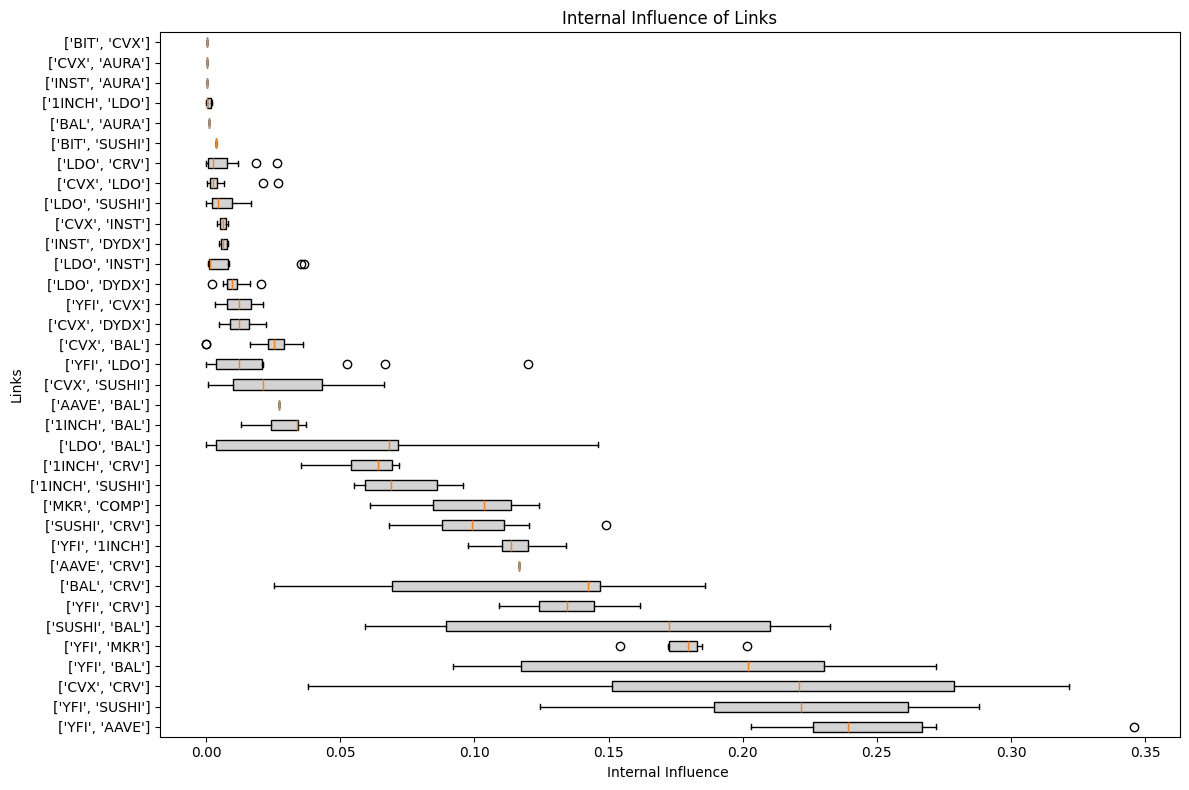

<Figure size 640x480 with 0 Axes>

In [12]:
plot_boxplot(metric_dataframes, metric='internal_influence', unit='',group='sample', output_path="../output/links/", save=True, show=True)

### Fig: gini_internal_influence 

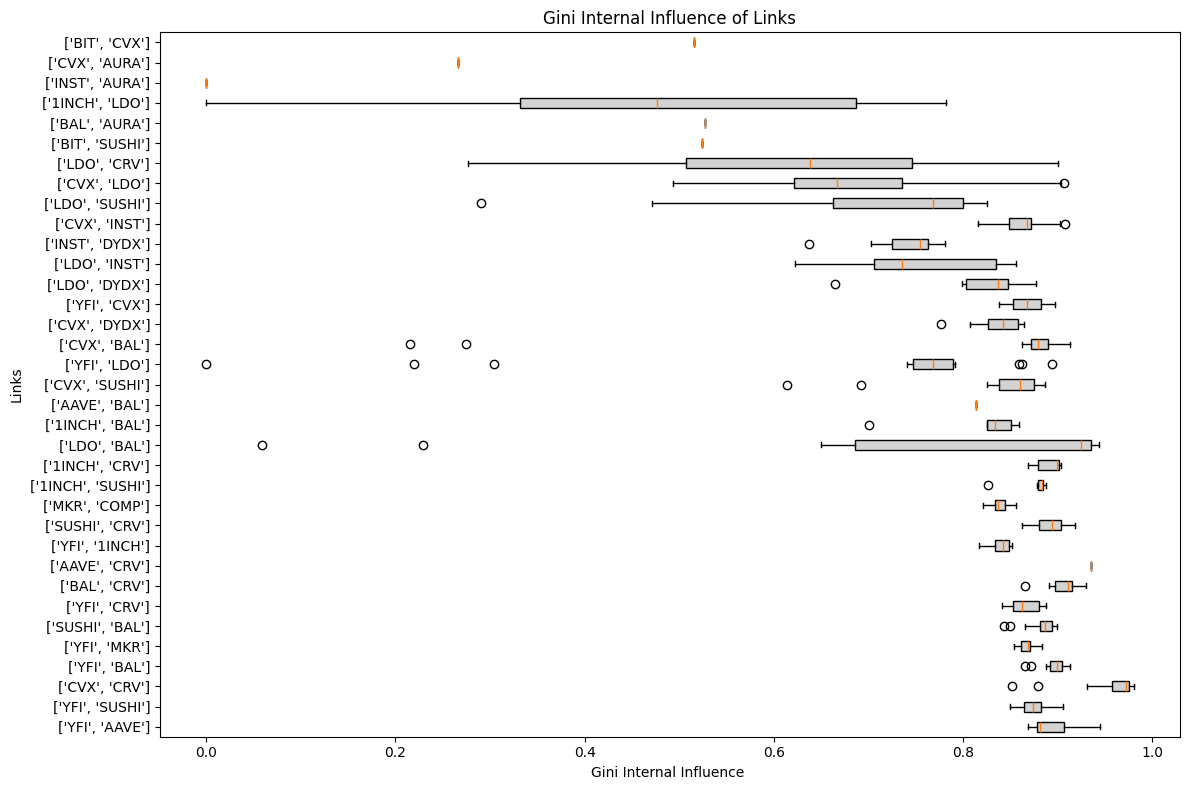

<Figure size 640x480 with 0 Axes>

In [13]:
plot_boxplot(metric_dataframes, metric='gini_internal_influence', unit='', group='sample', output_path="../output/links/", save=True, show=True)

### Fig: external_influence

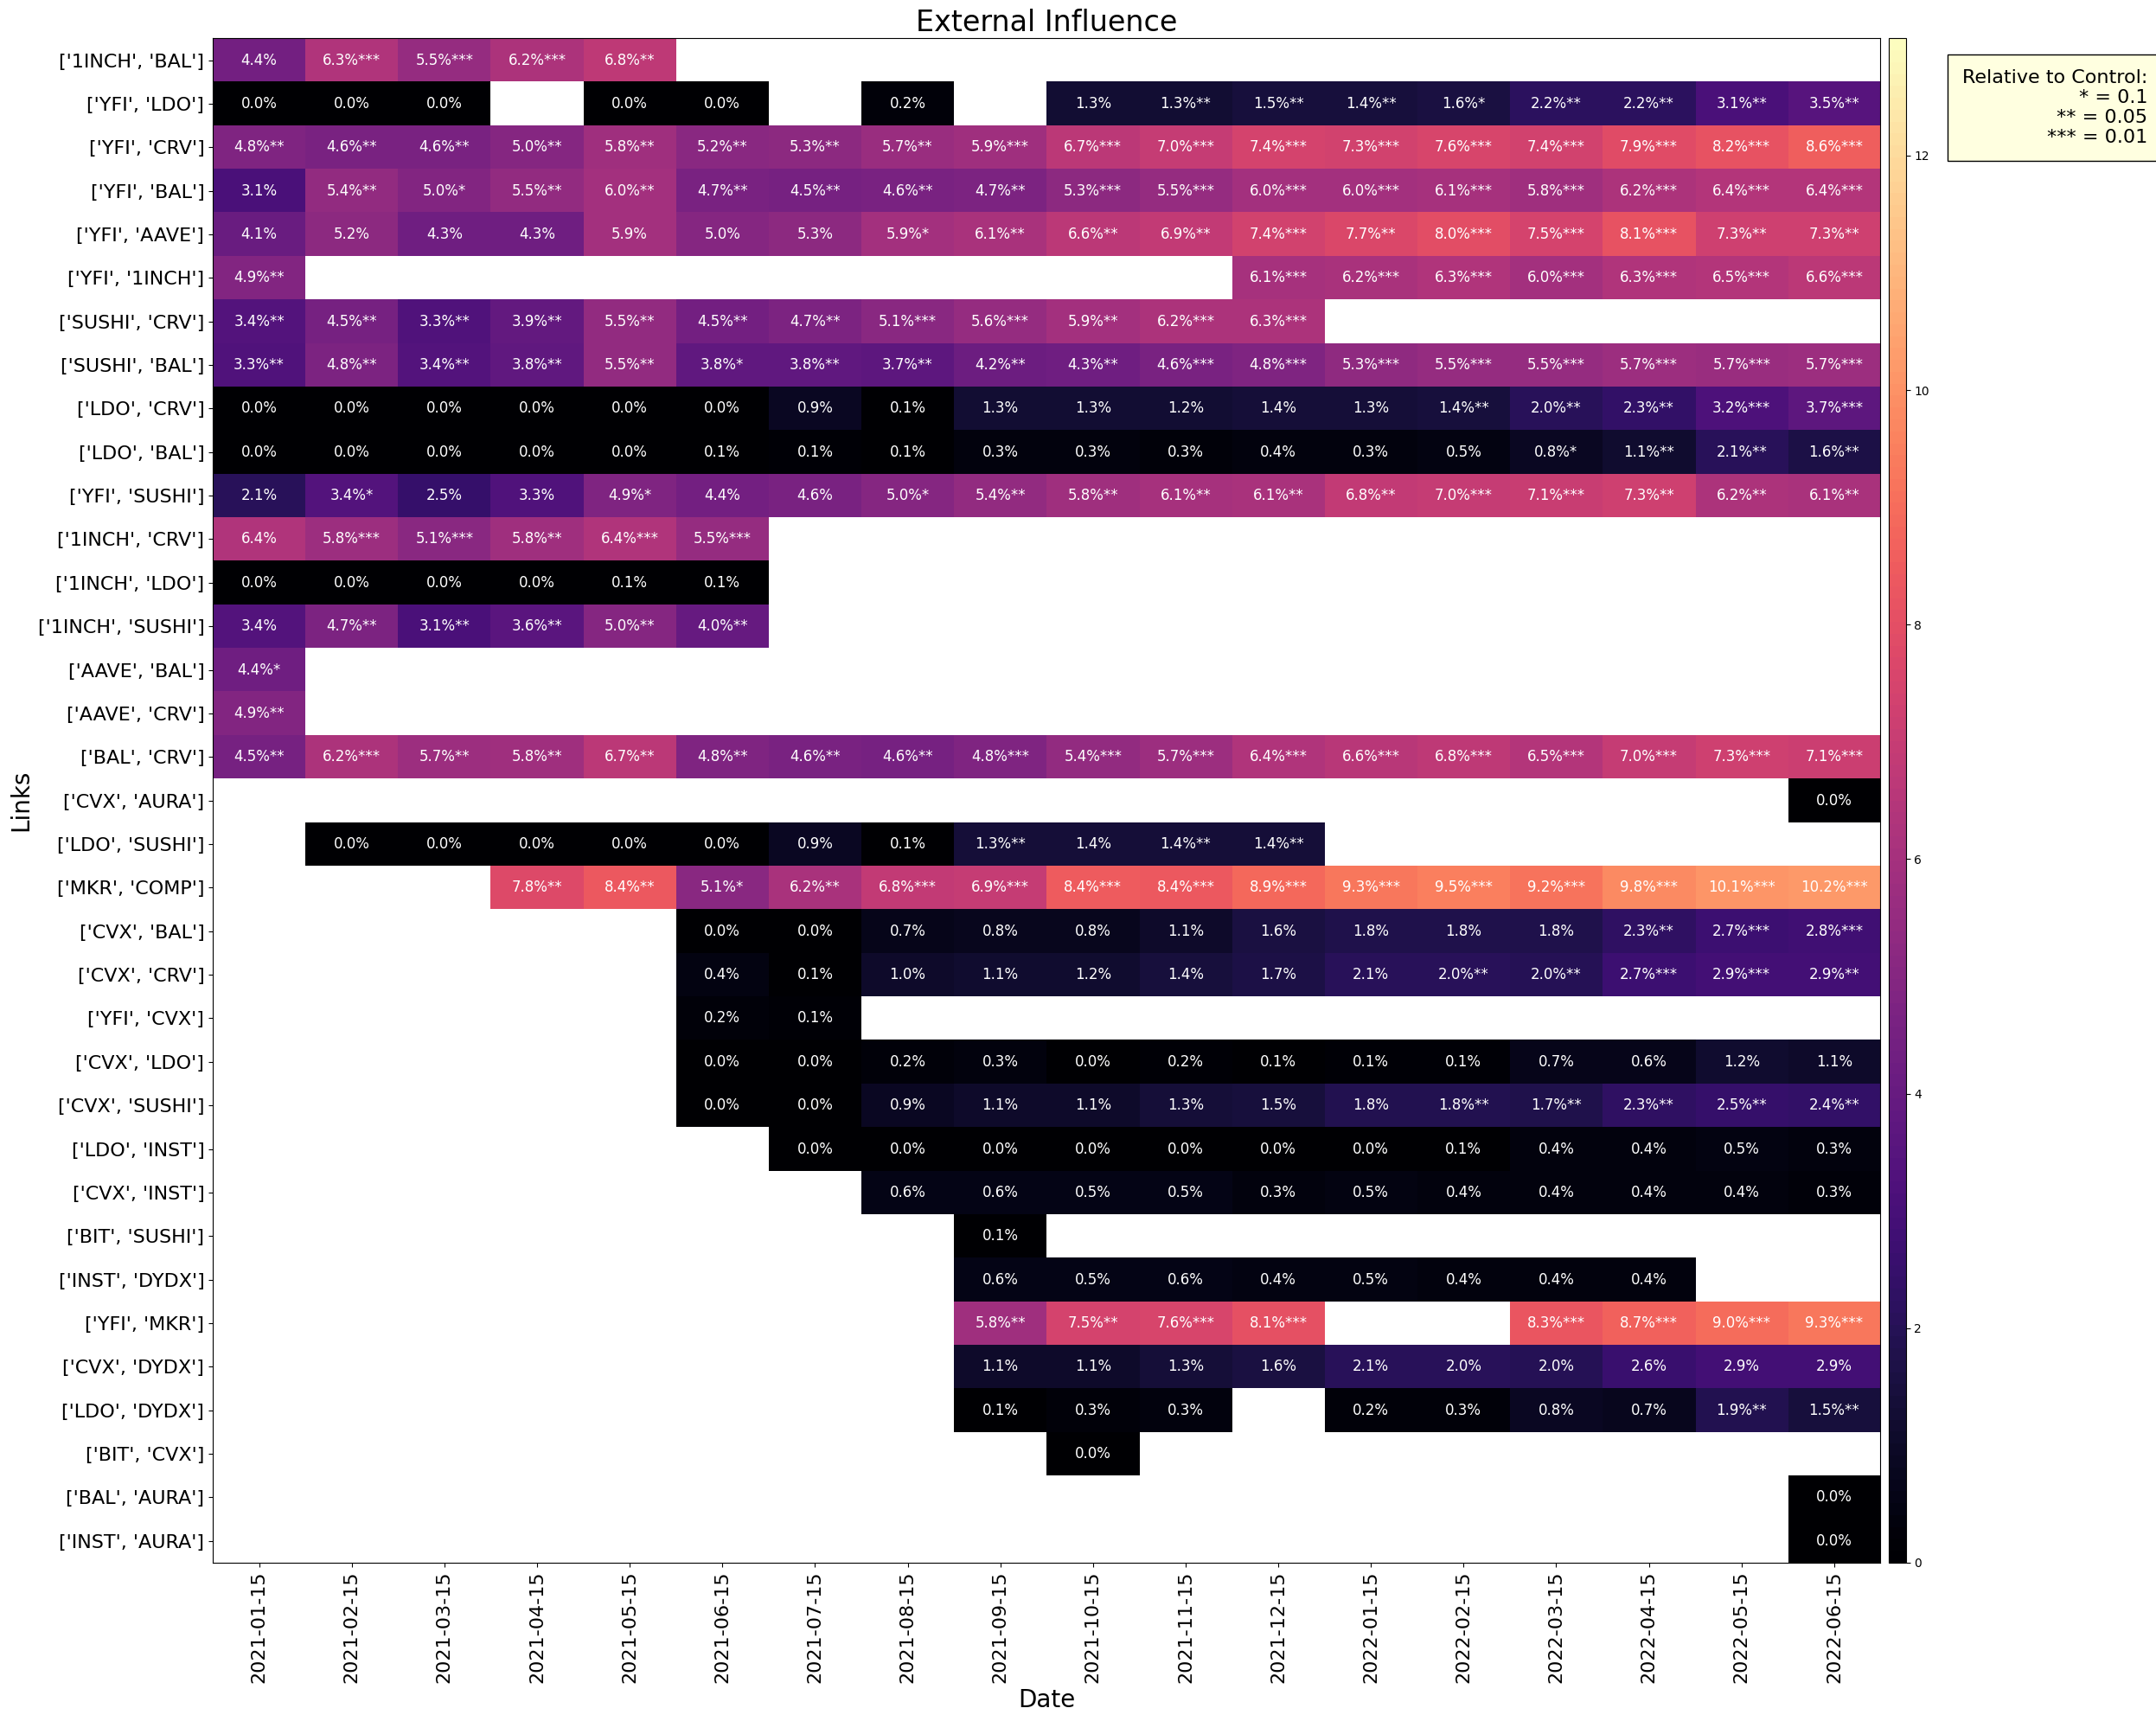

In [14]:
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, output_path="../output/links/", save=True, show=True)

### Fig: gini_external_influence

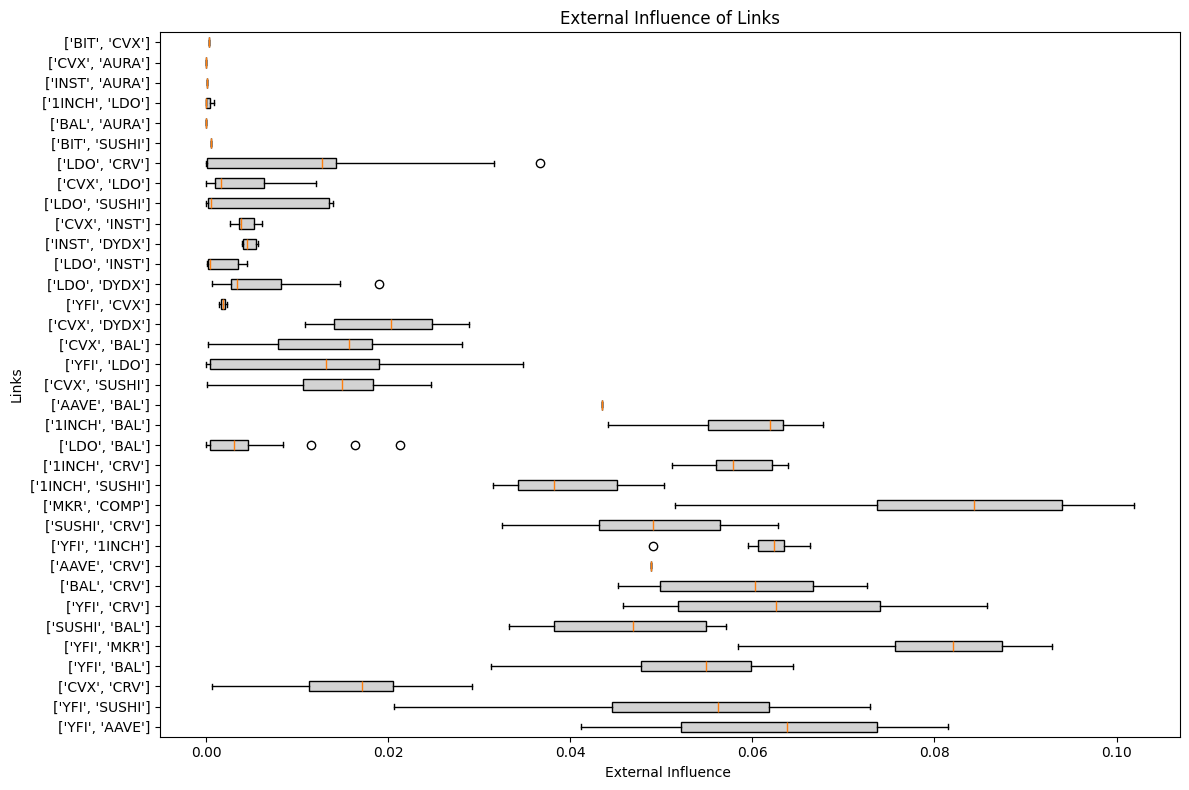

<Figure size 640x480 with 0 Axes>

In [15]:
plot_boxplot(metric_dataframes, metric='external_influence', unit='', group='sample', output_path="../output/links/", save=True, show=True)

### Fig: wealth_clique


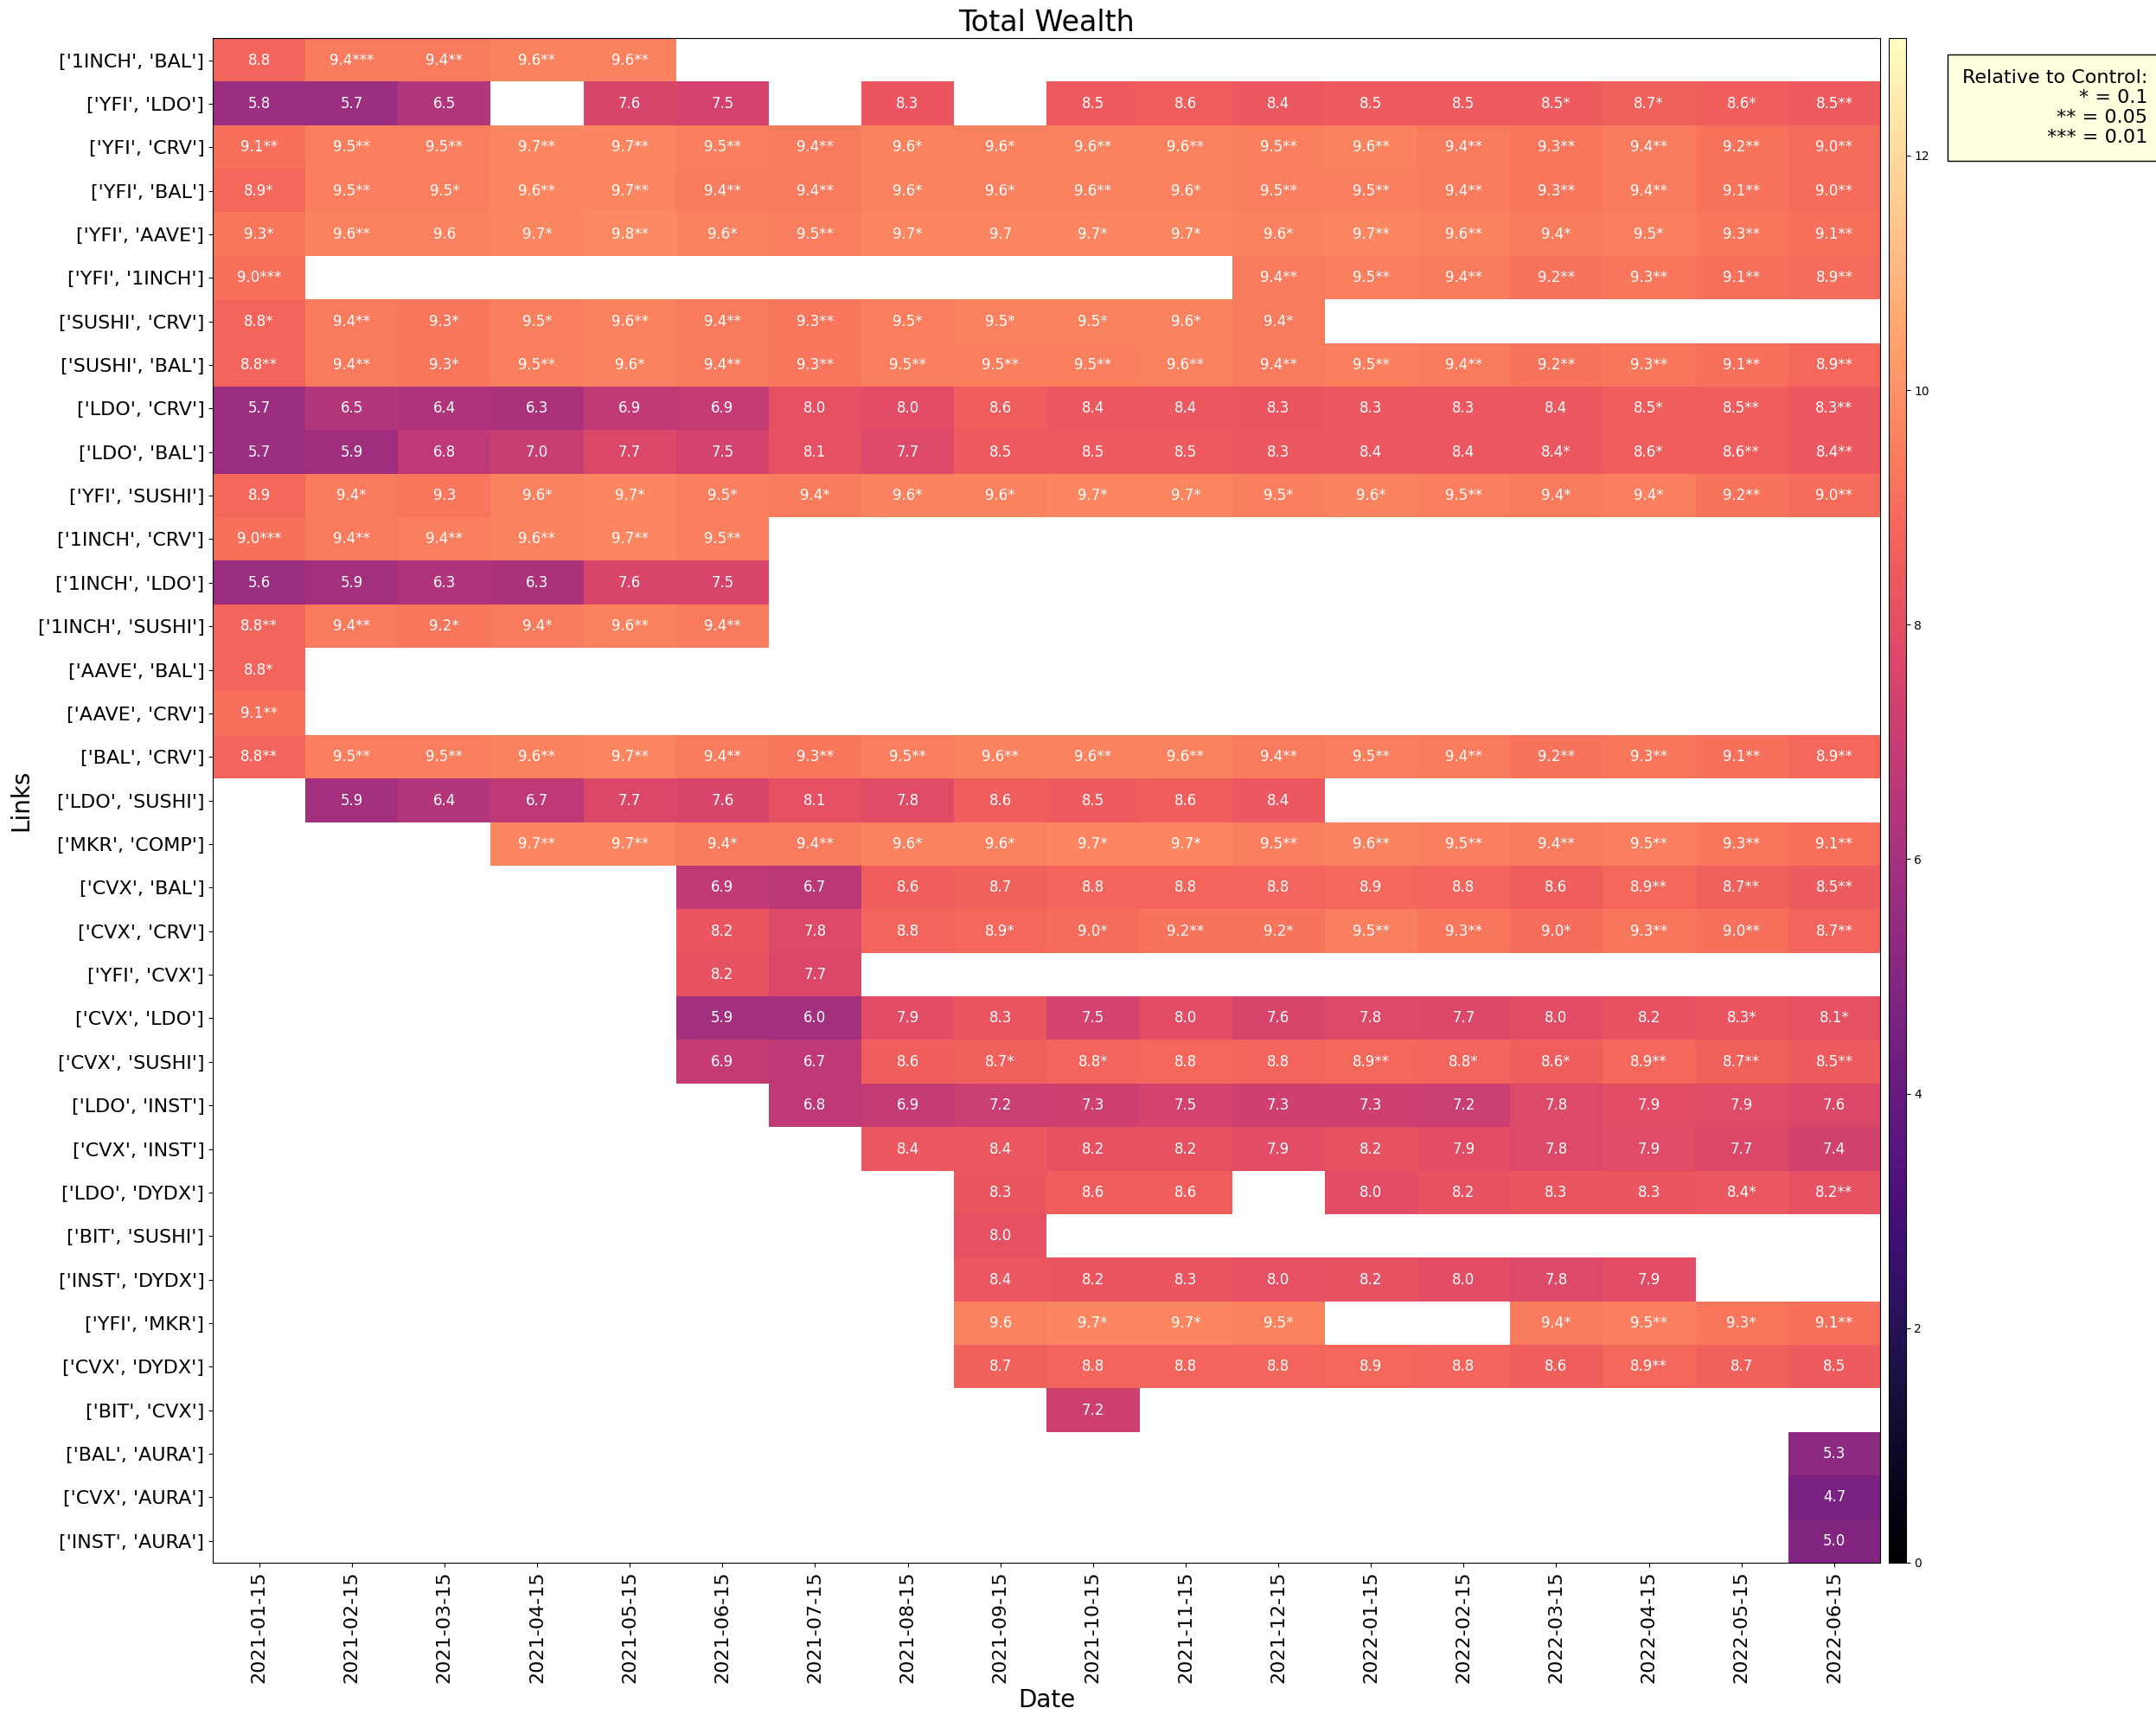

In [16]:
plot_heatmap_chart(metric_dataframes, metric_name='total_wealth', pct=False, log=True, output_path="../output/links/", save=True, show=True)

### Fig: gini_wealth_clique

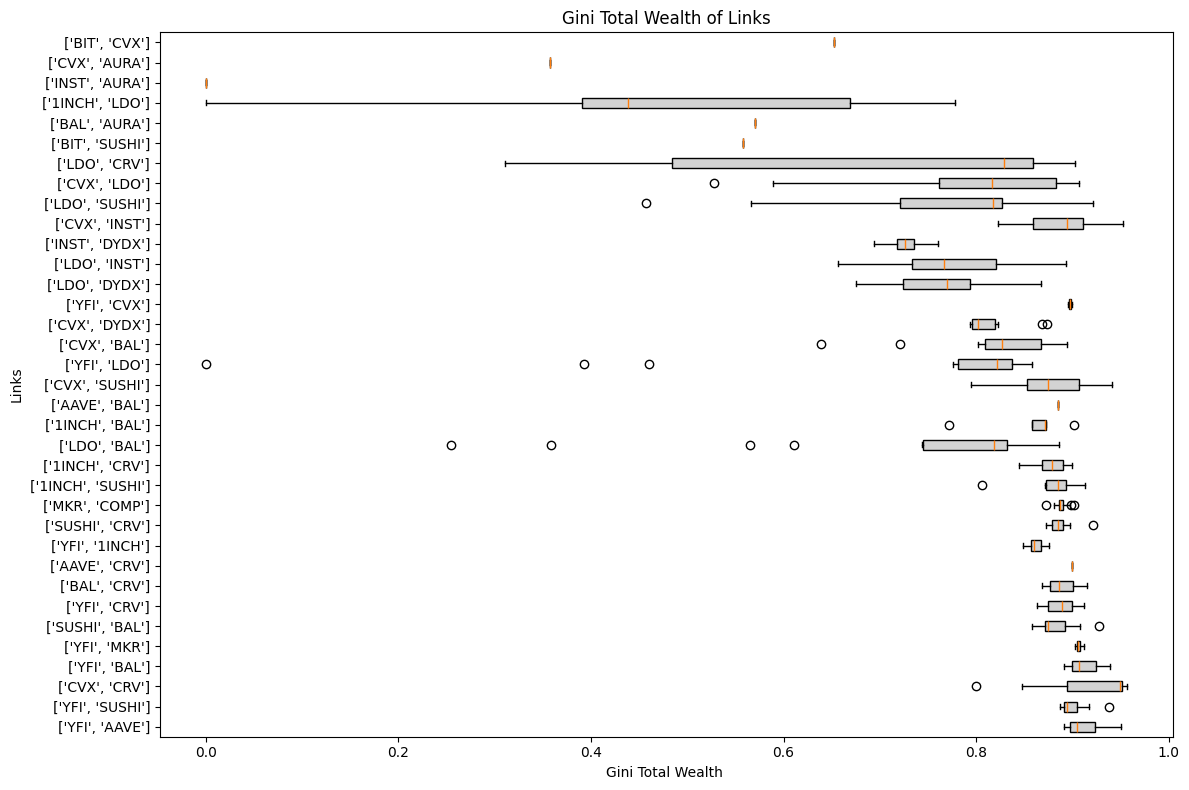

<Figure size 640x480 with 0 Axes>

In [17]:

plot_boxplot(metric_dataframes, metric='gini_total_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


### Fig: median_wealth_level

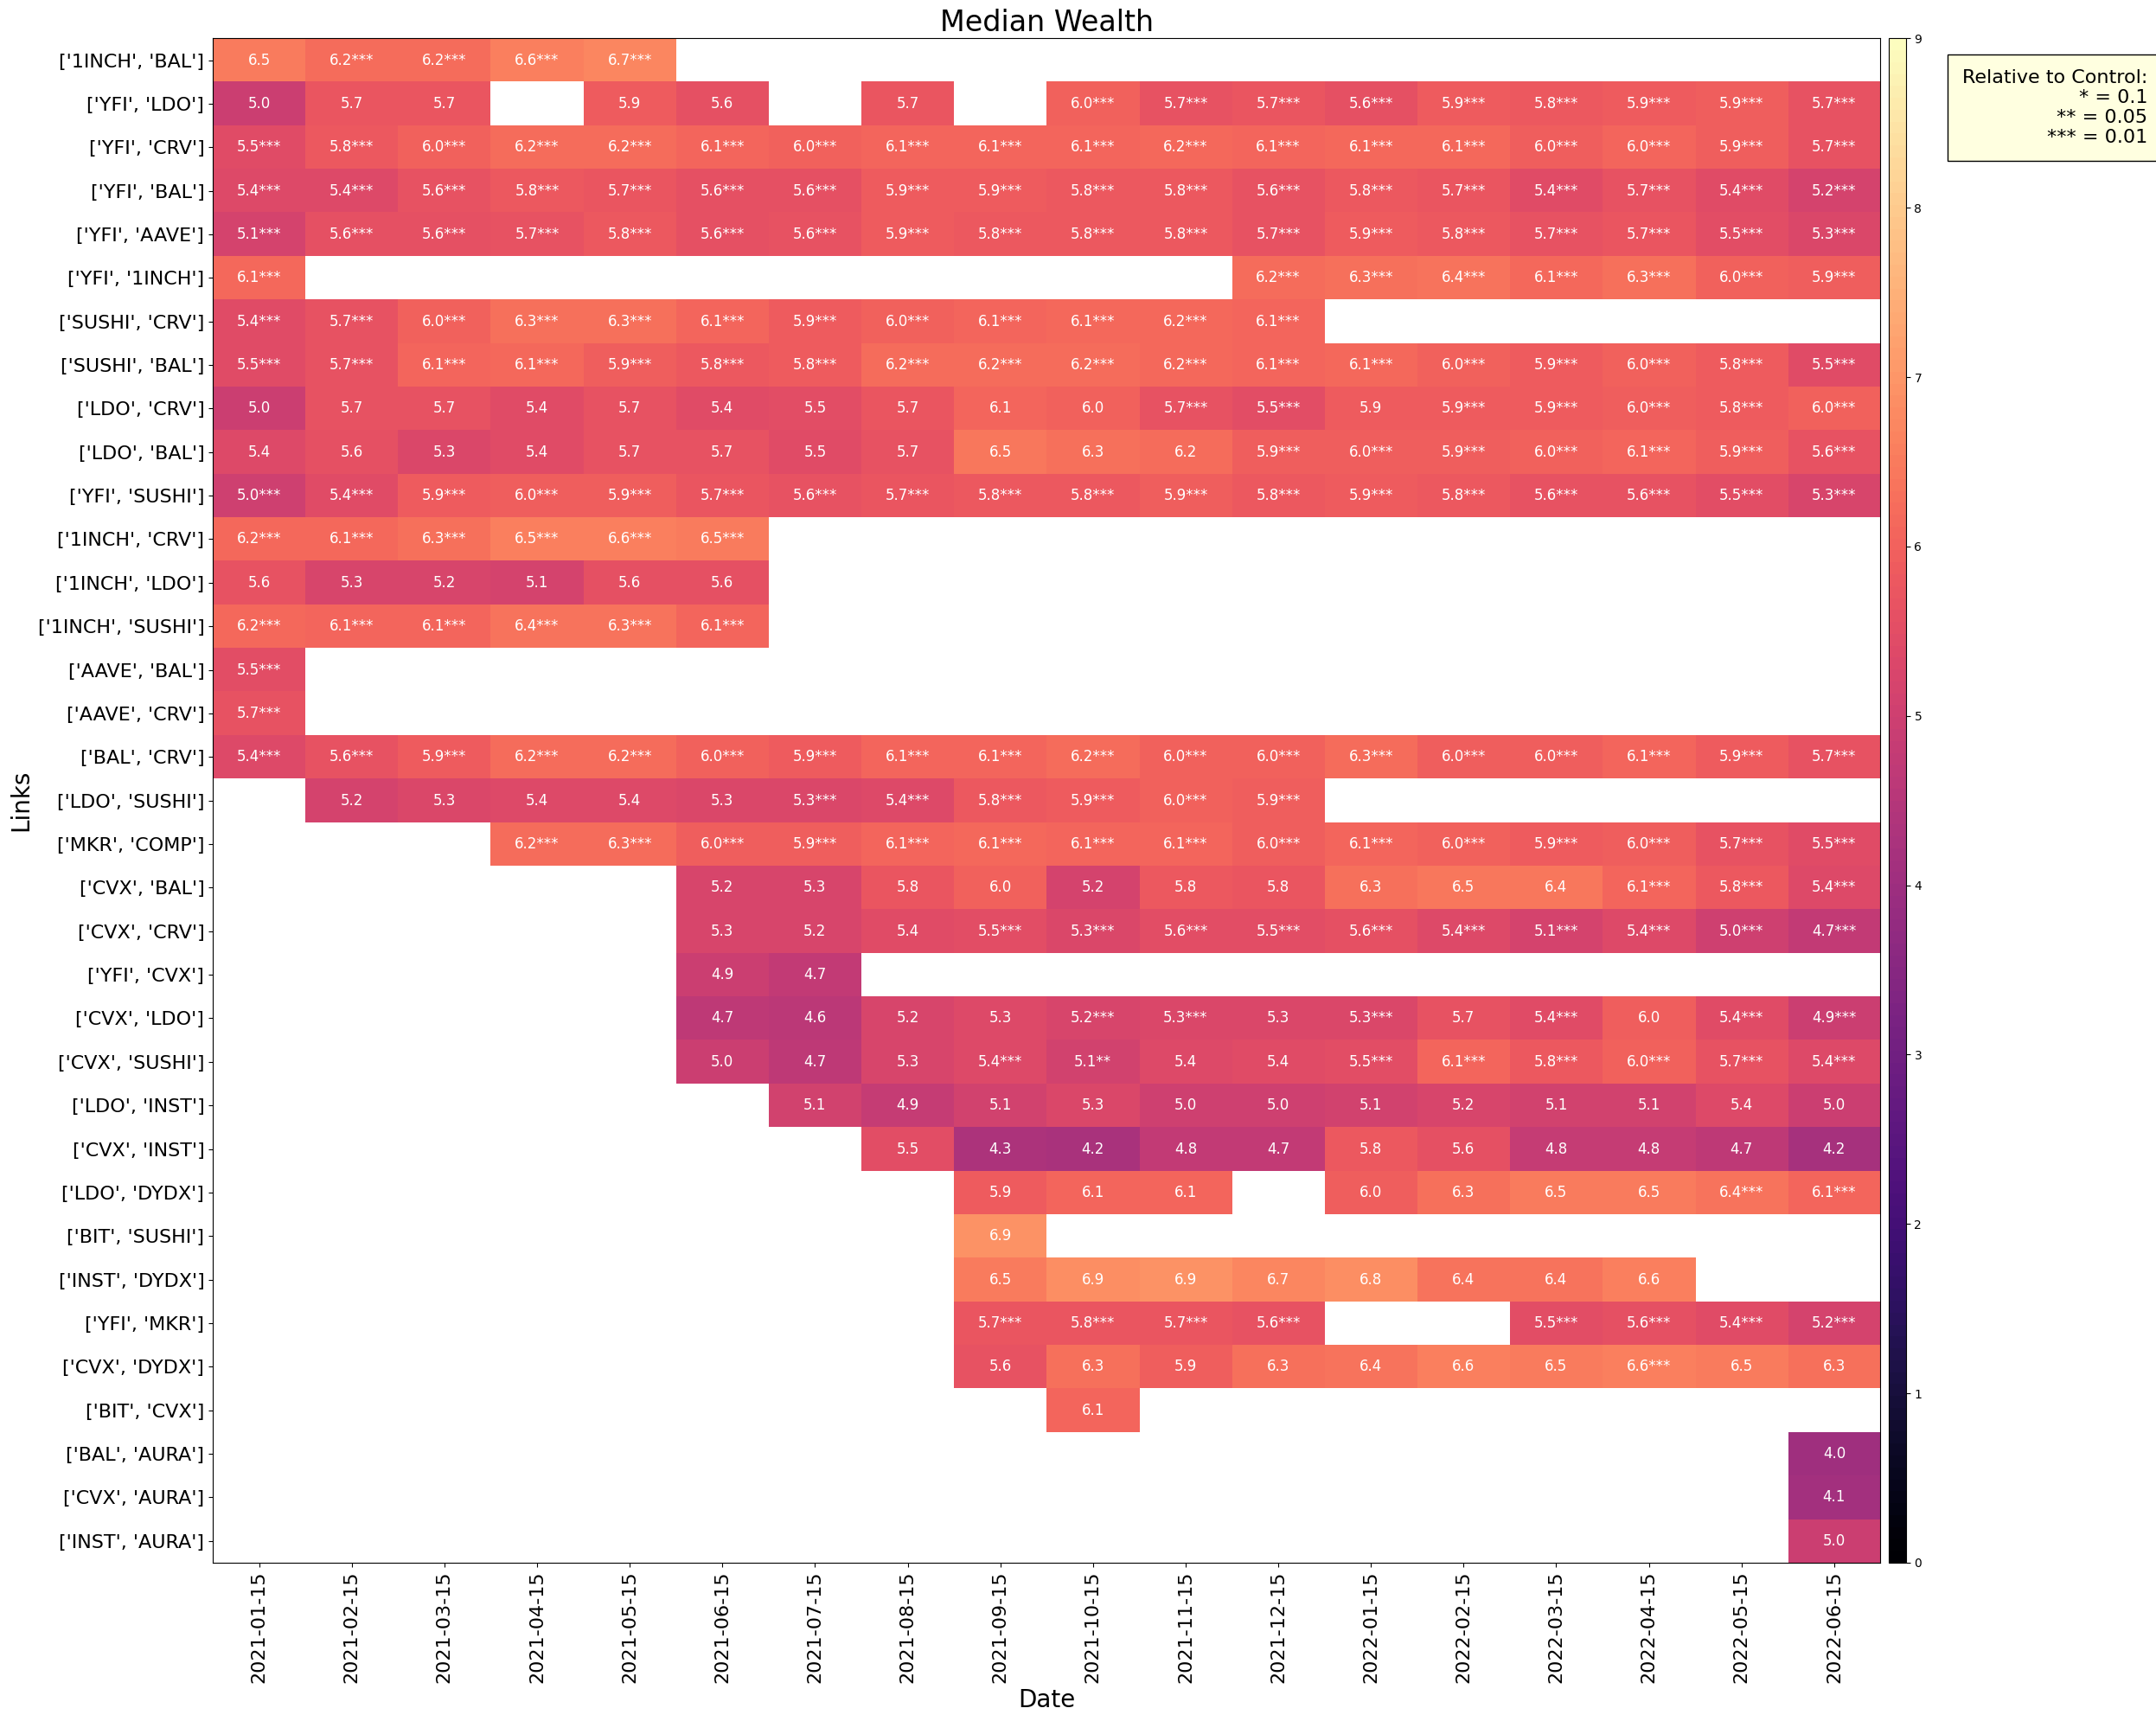

In [18]:
plot_heatmap_chart(metric_dataframes, metric_name='median_wealth', pct=False, log=True, output_path="../output/links/", save=True, show=True)

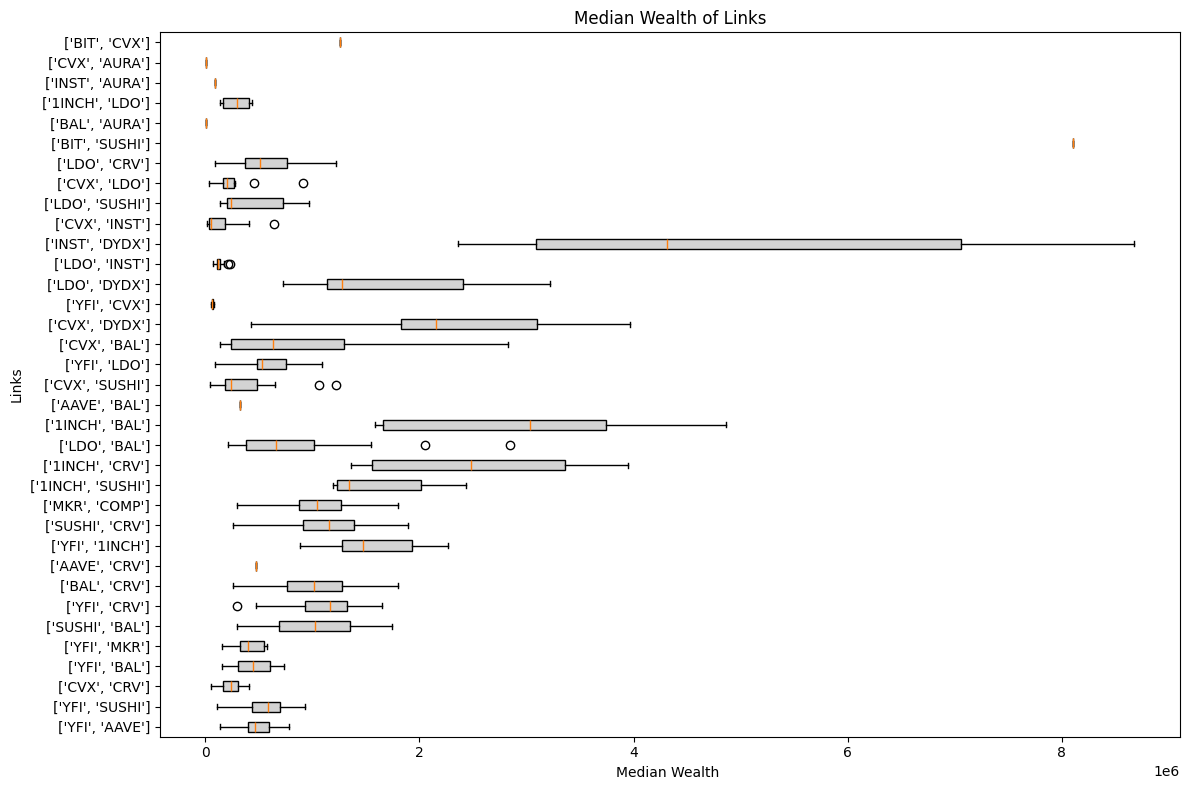

<Figure size 640x480 with 0 Axes>

In [19]:
plot_boxplot(metric_dataframes, metric='median_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


### Fig: internal_wealth

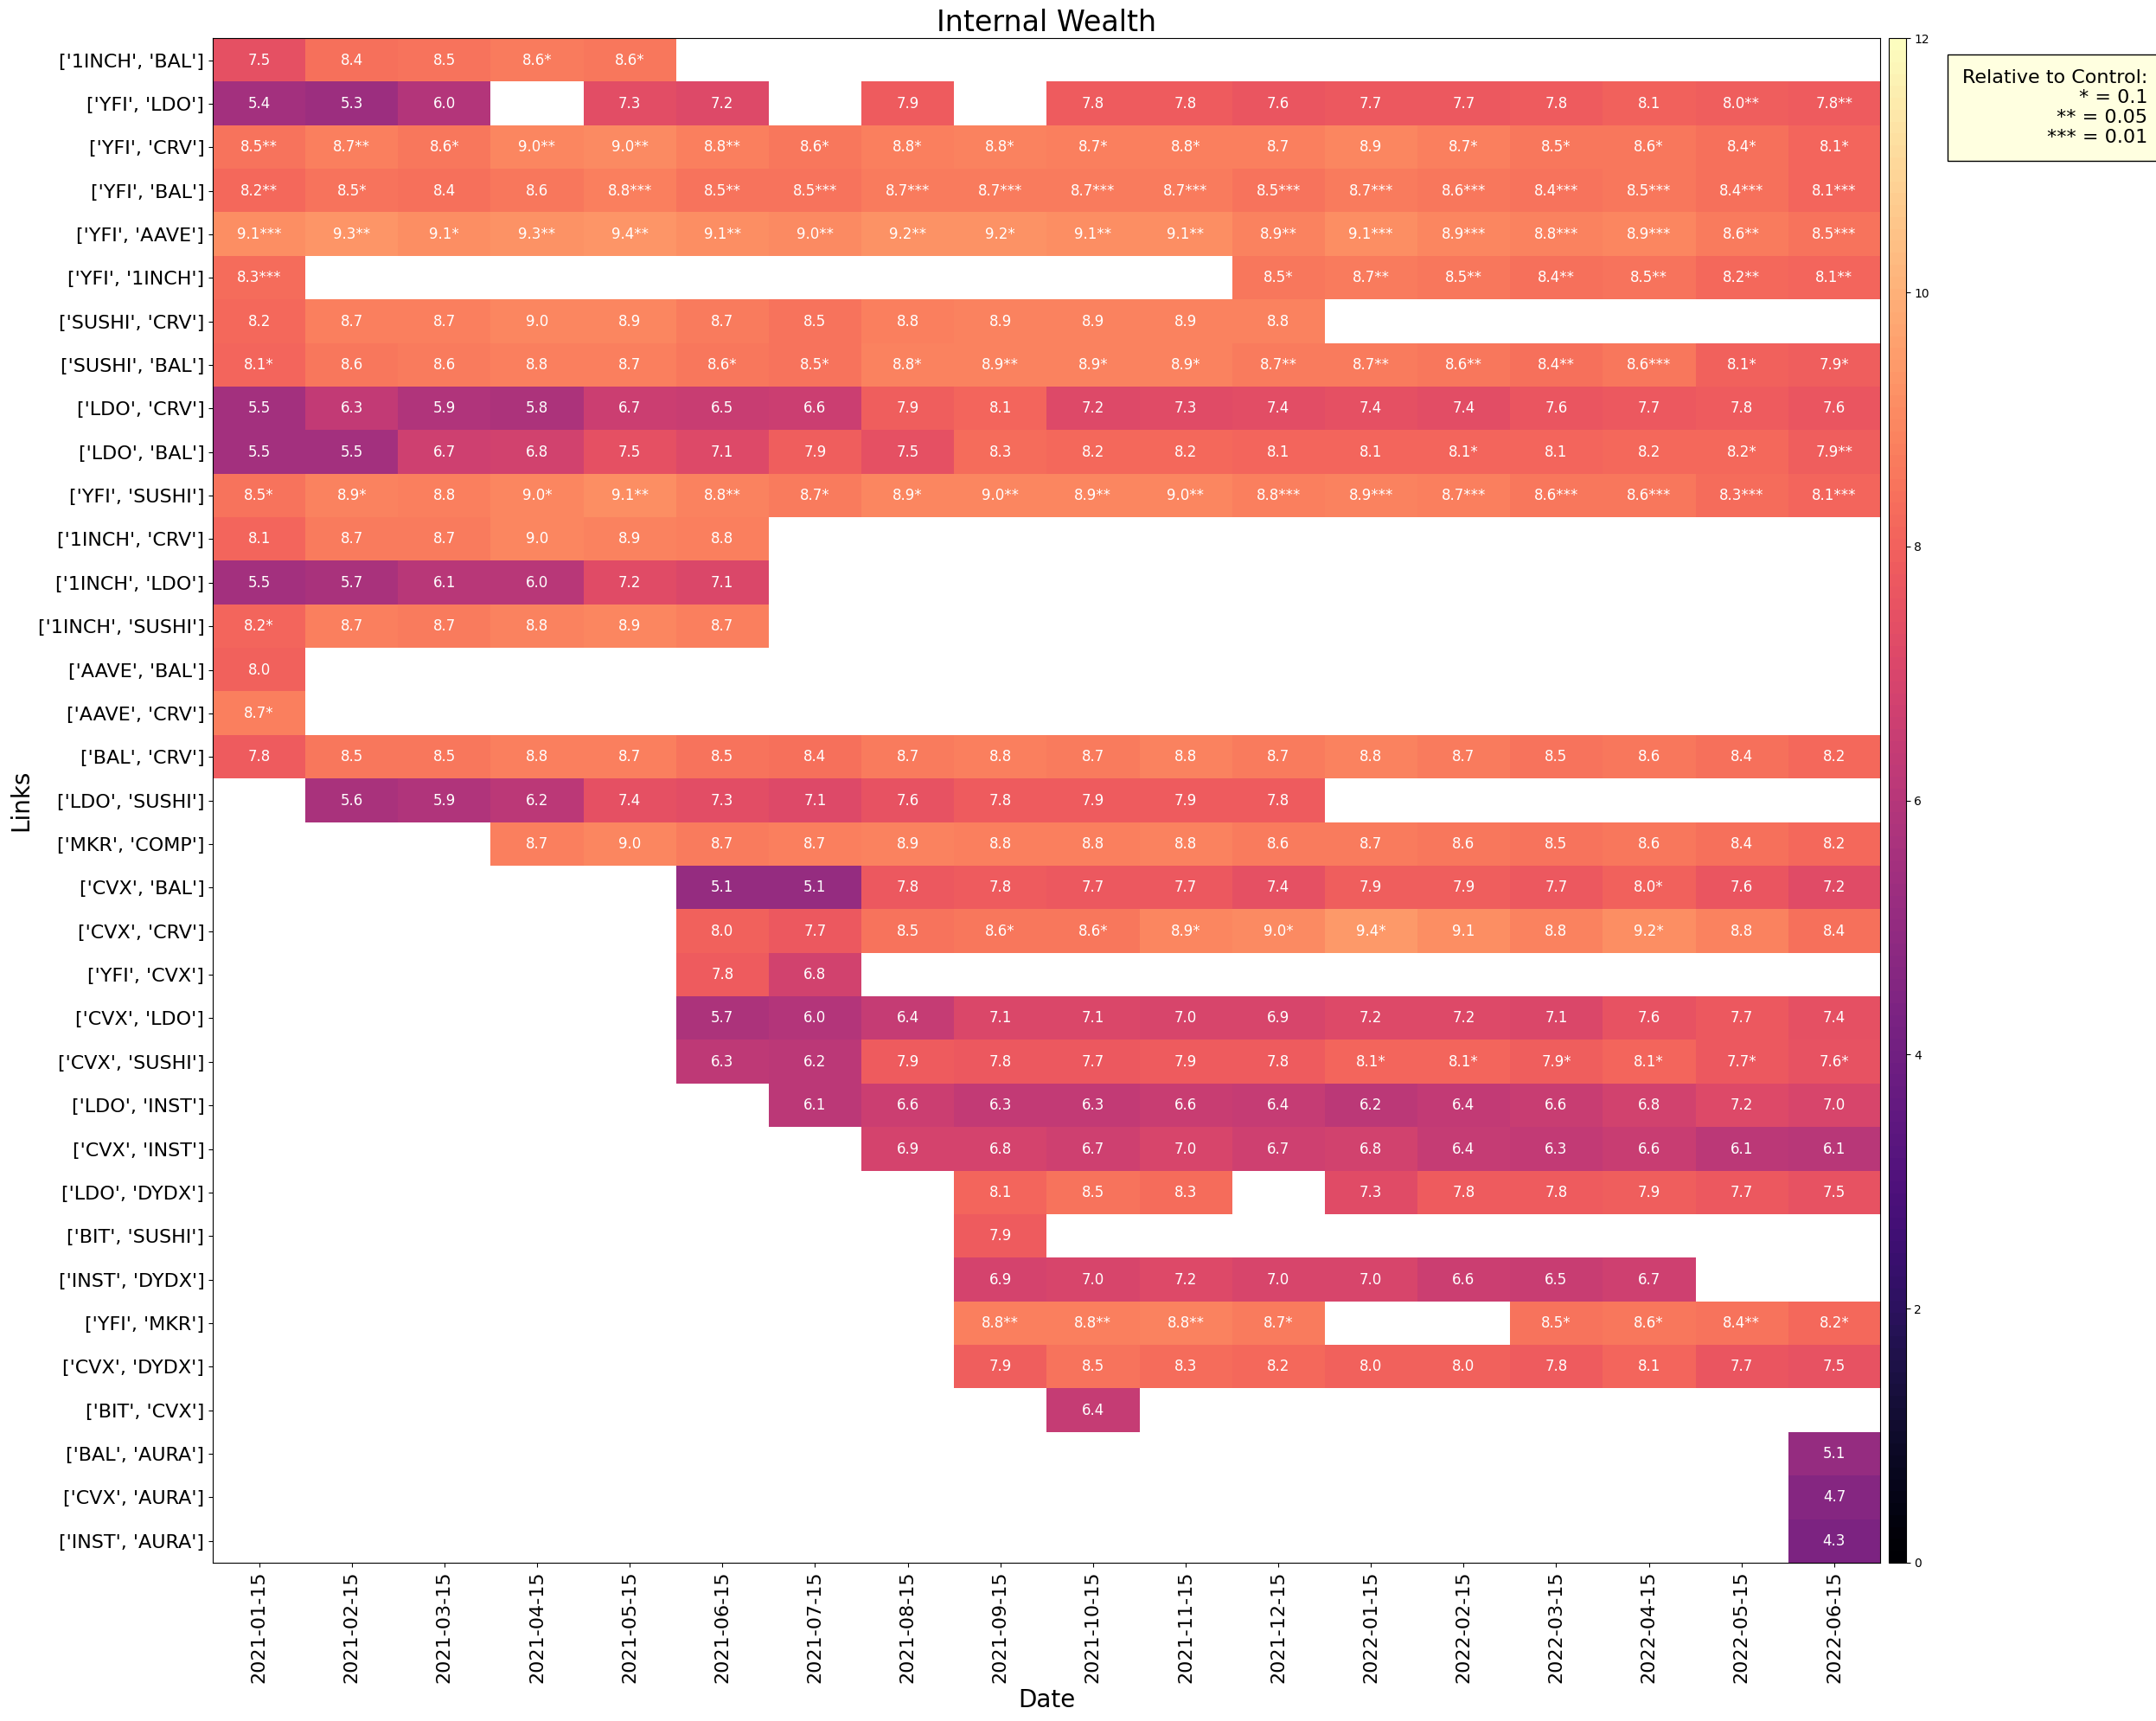

In [20]:
plot_heatmap_chart(metric_dataframes, metric_name='internal_wealth', pct=False, log=True, output_path="../output/links/", save=True, show=True)

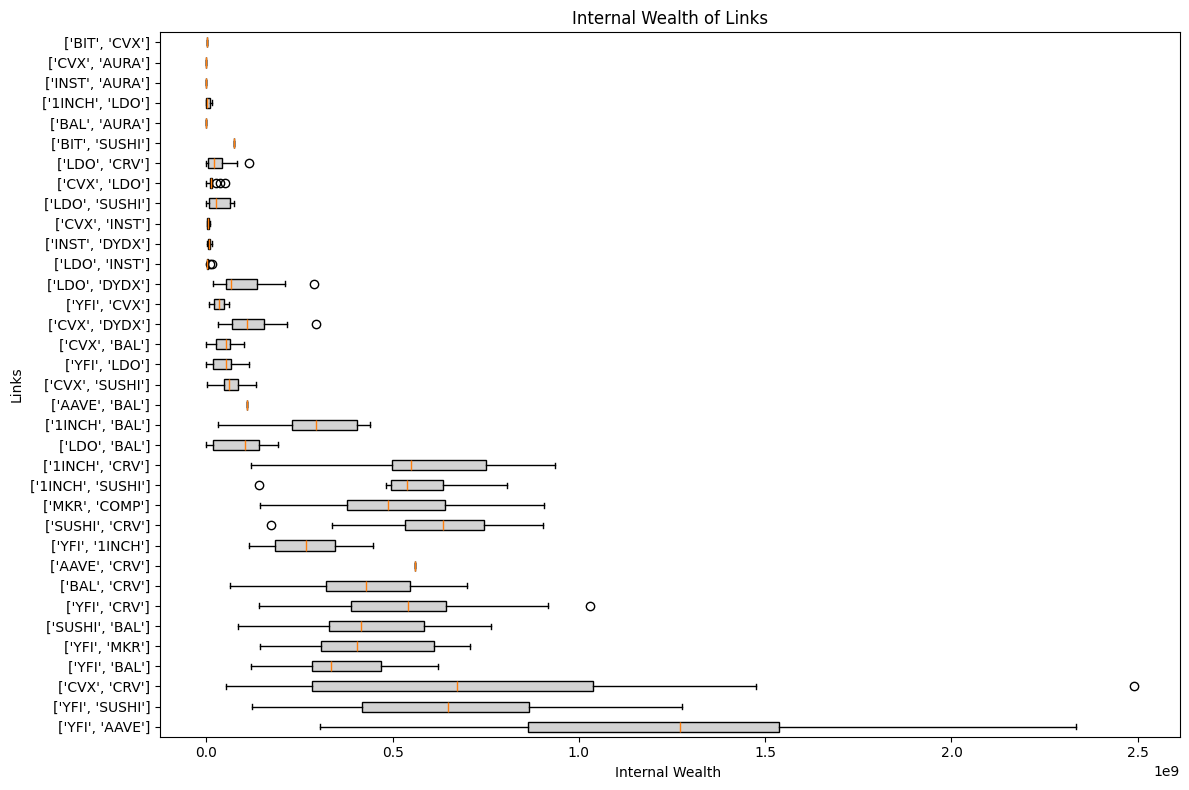

<Figure size 640x480 with 0 Axes>

In [21]:

plot_boxplot(metric_dataframes, metric='internal_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


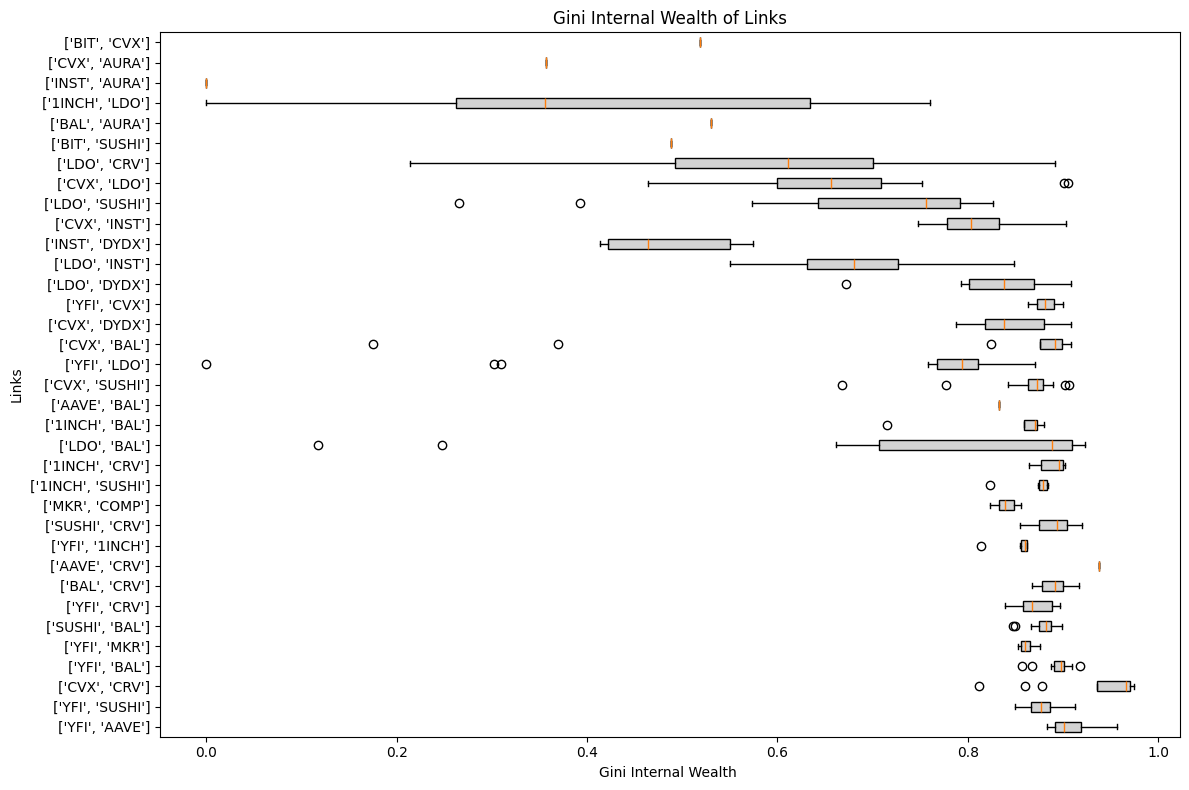

<Figure size 640x480 with 0 Axes>

In [22]:
plot_boxplot(metric_dataframes, metric='gini_internal_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


### Fig: external_wealth

/home/xm3van/research-project-erc20-governance/.venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


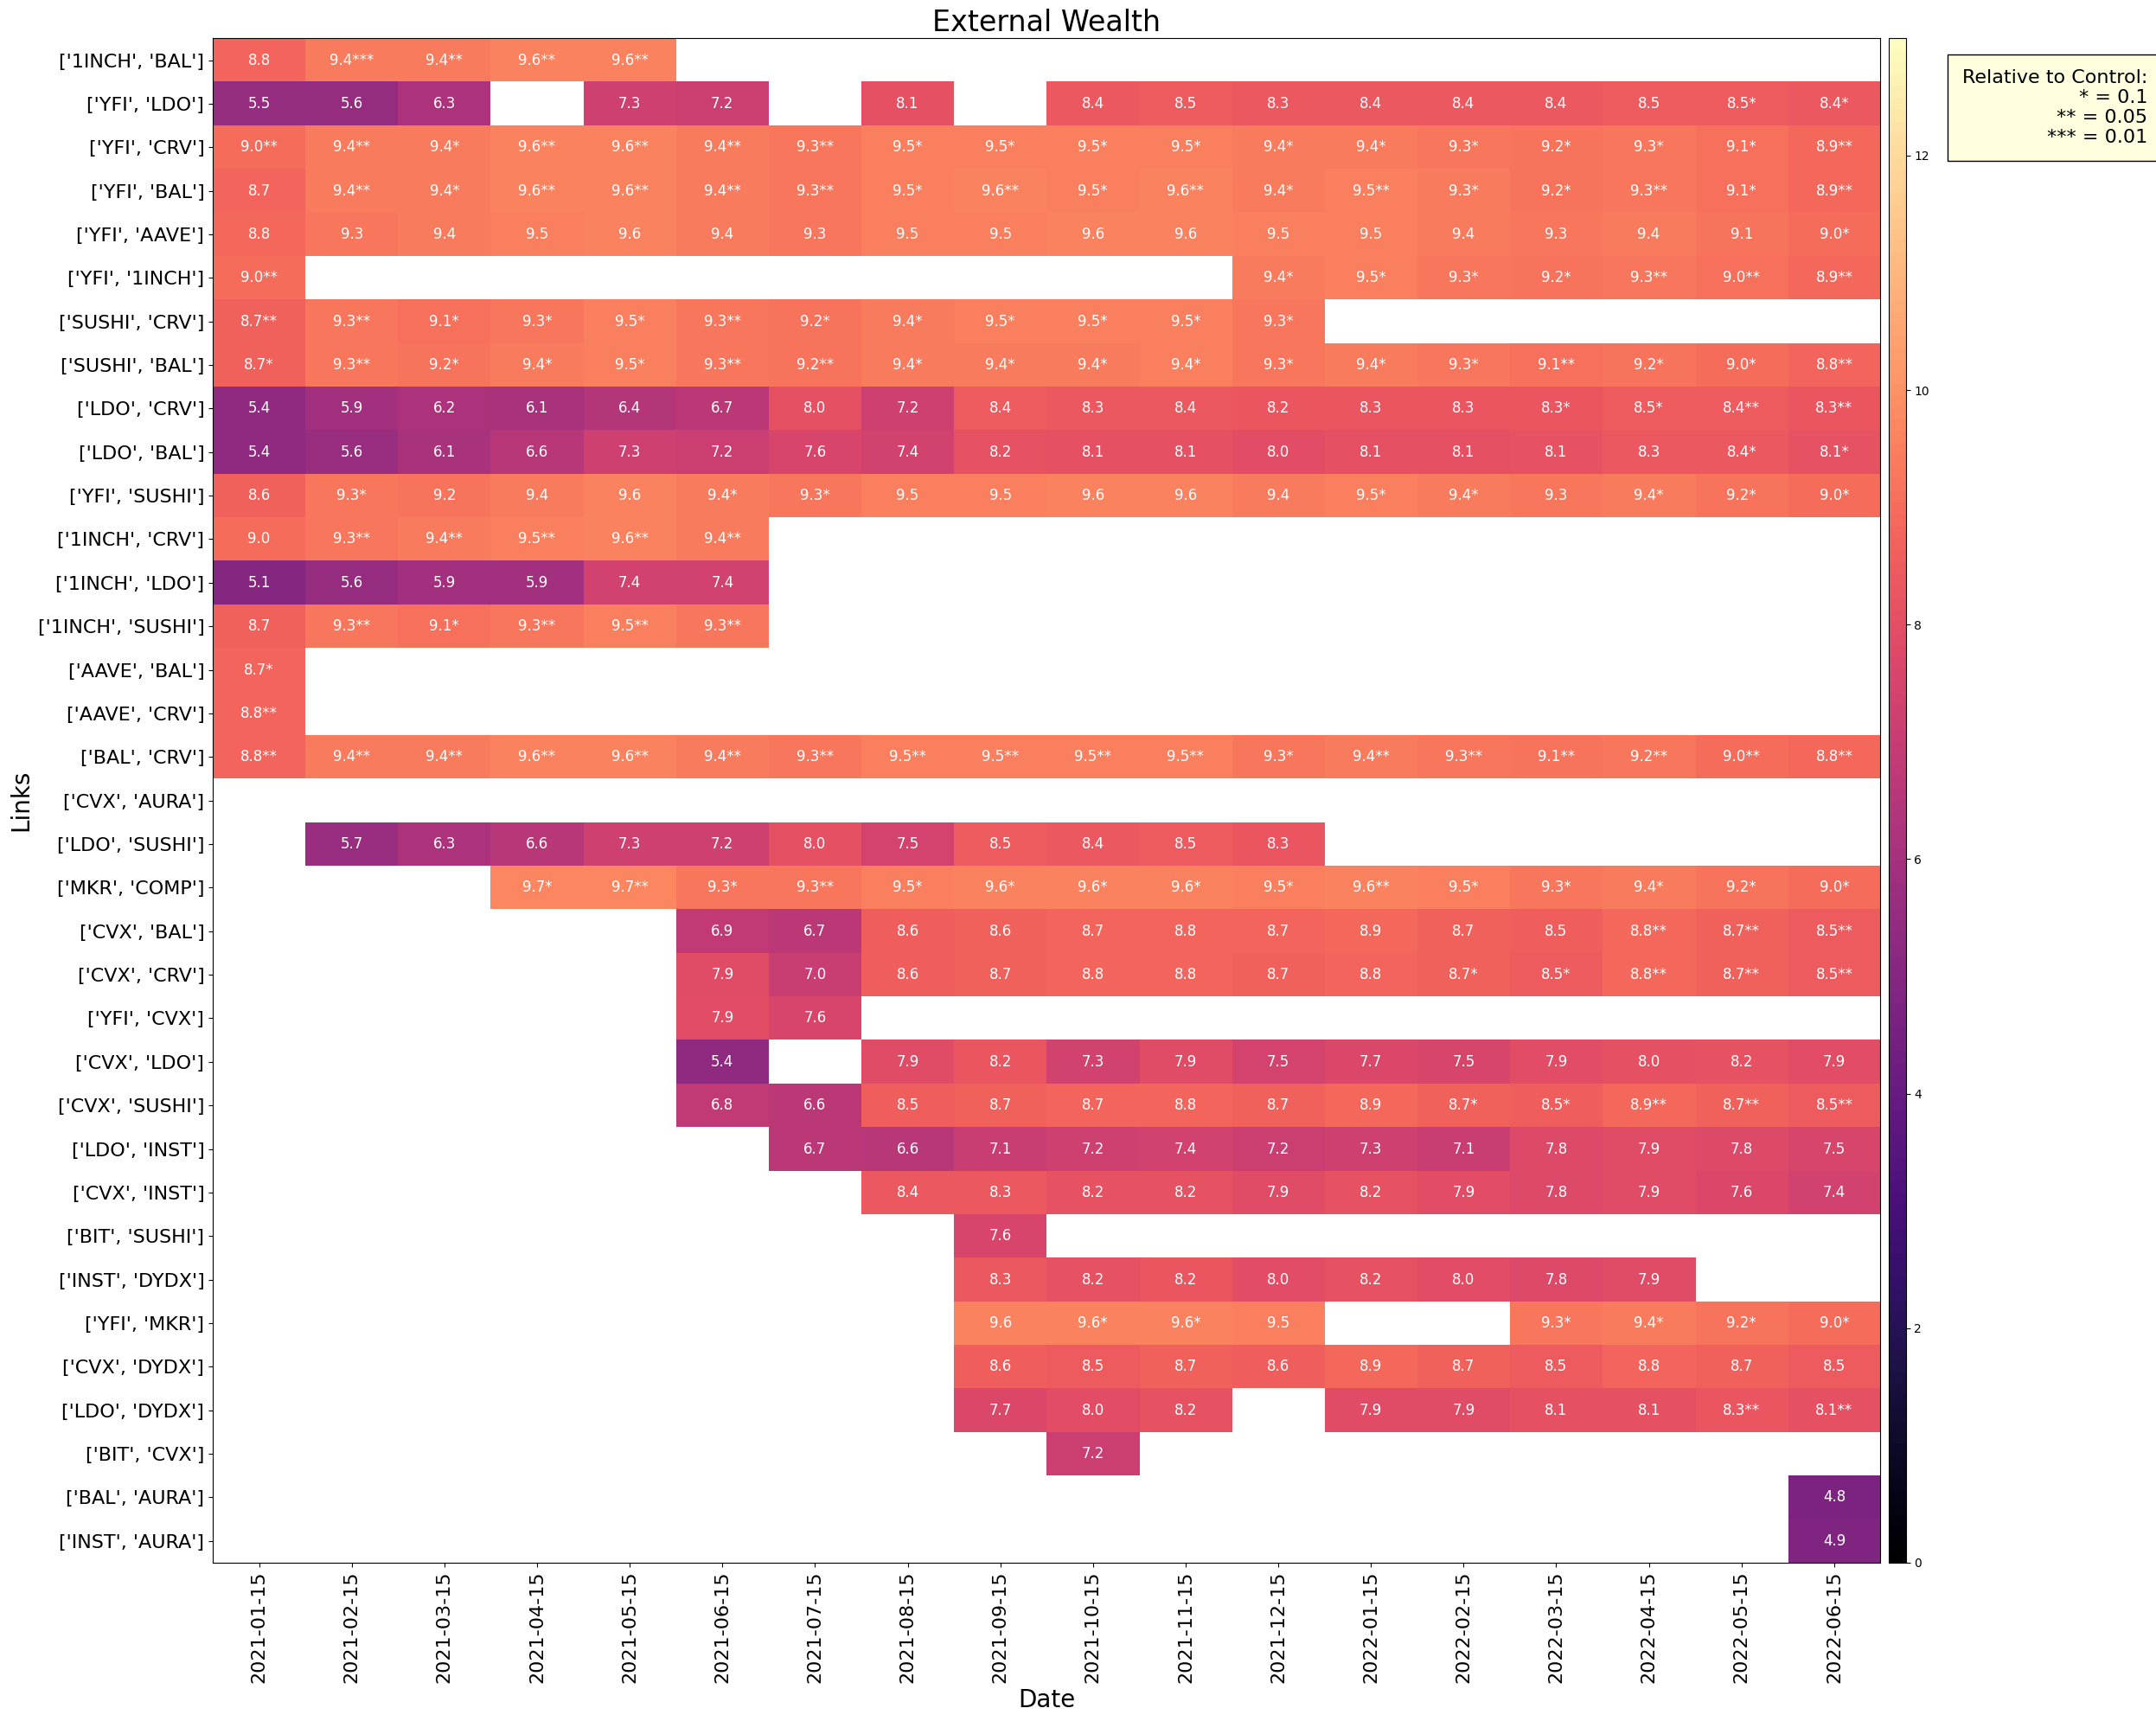

In [23]:
plot_heatmap_chart(metric_dataframes, metric_name='external_wealth', pct=False, log=True, output_path="../output/links/", save=True, show=True)

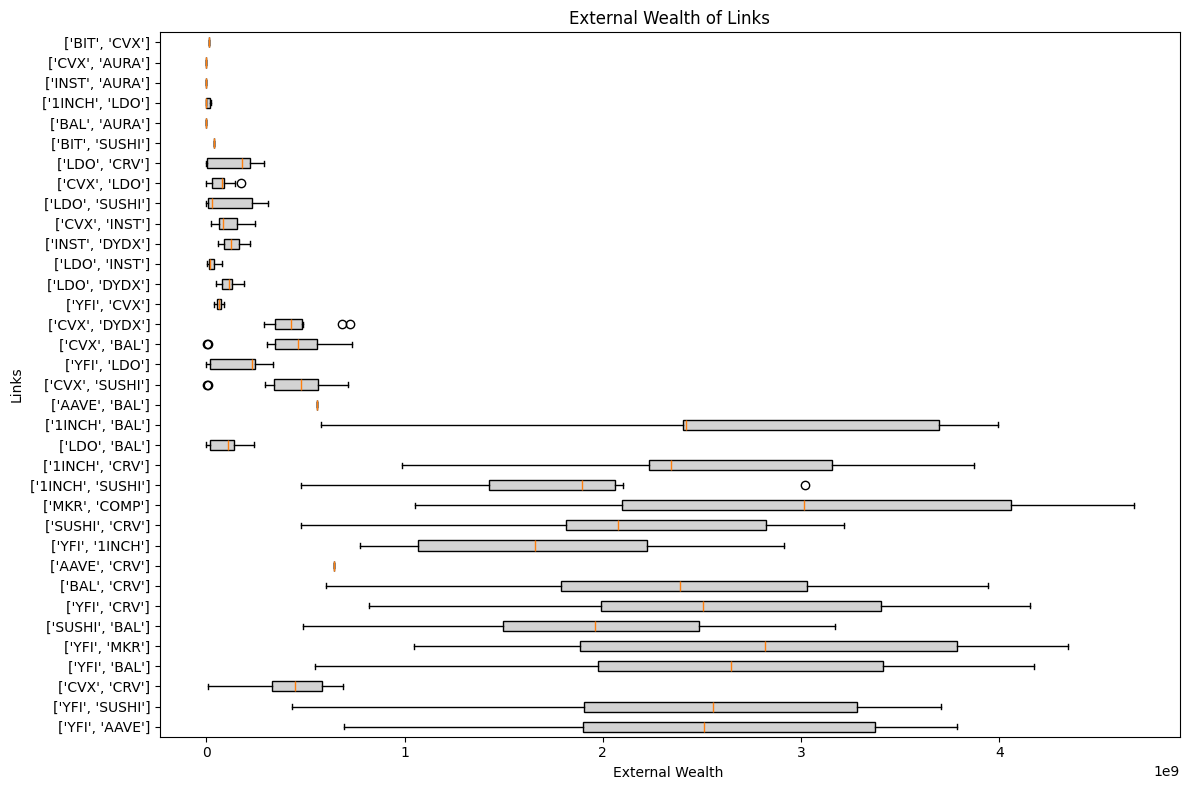

<Figure size 640x480 with 0 Axes>

In [24]:
plot_boxplot(metric_dataframes, metric='external_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


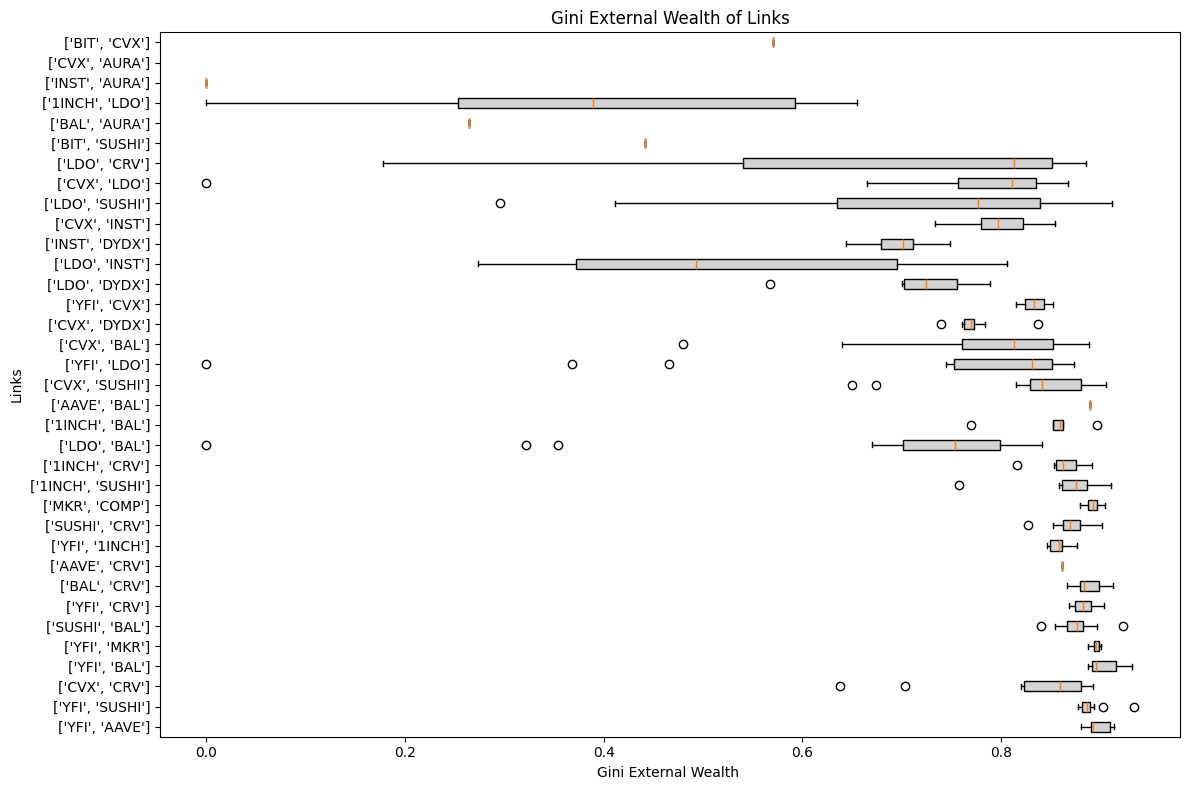

<Figure size 640x480 with 0 Axes>

In [25]:
plot_boxplot(metric_dataframes, metric='gini_external_wealth', unit='', group='sample', output_path="../output/links/", save=True, show=True)


### Fig: median_no_assets_link


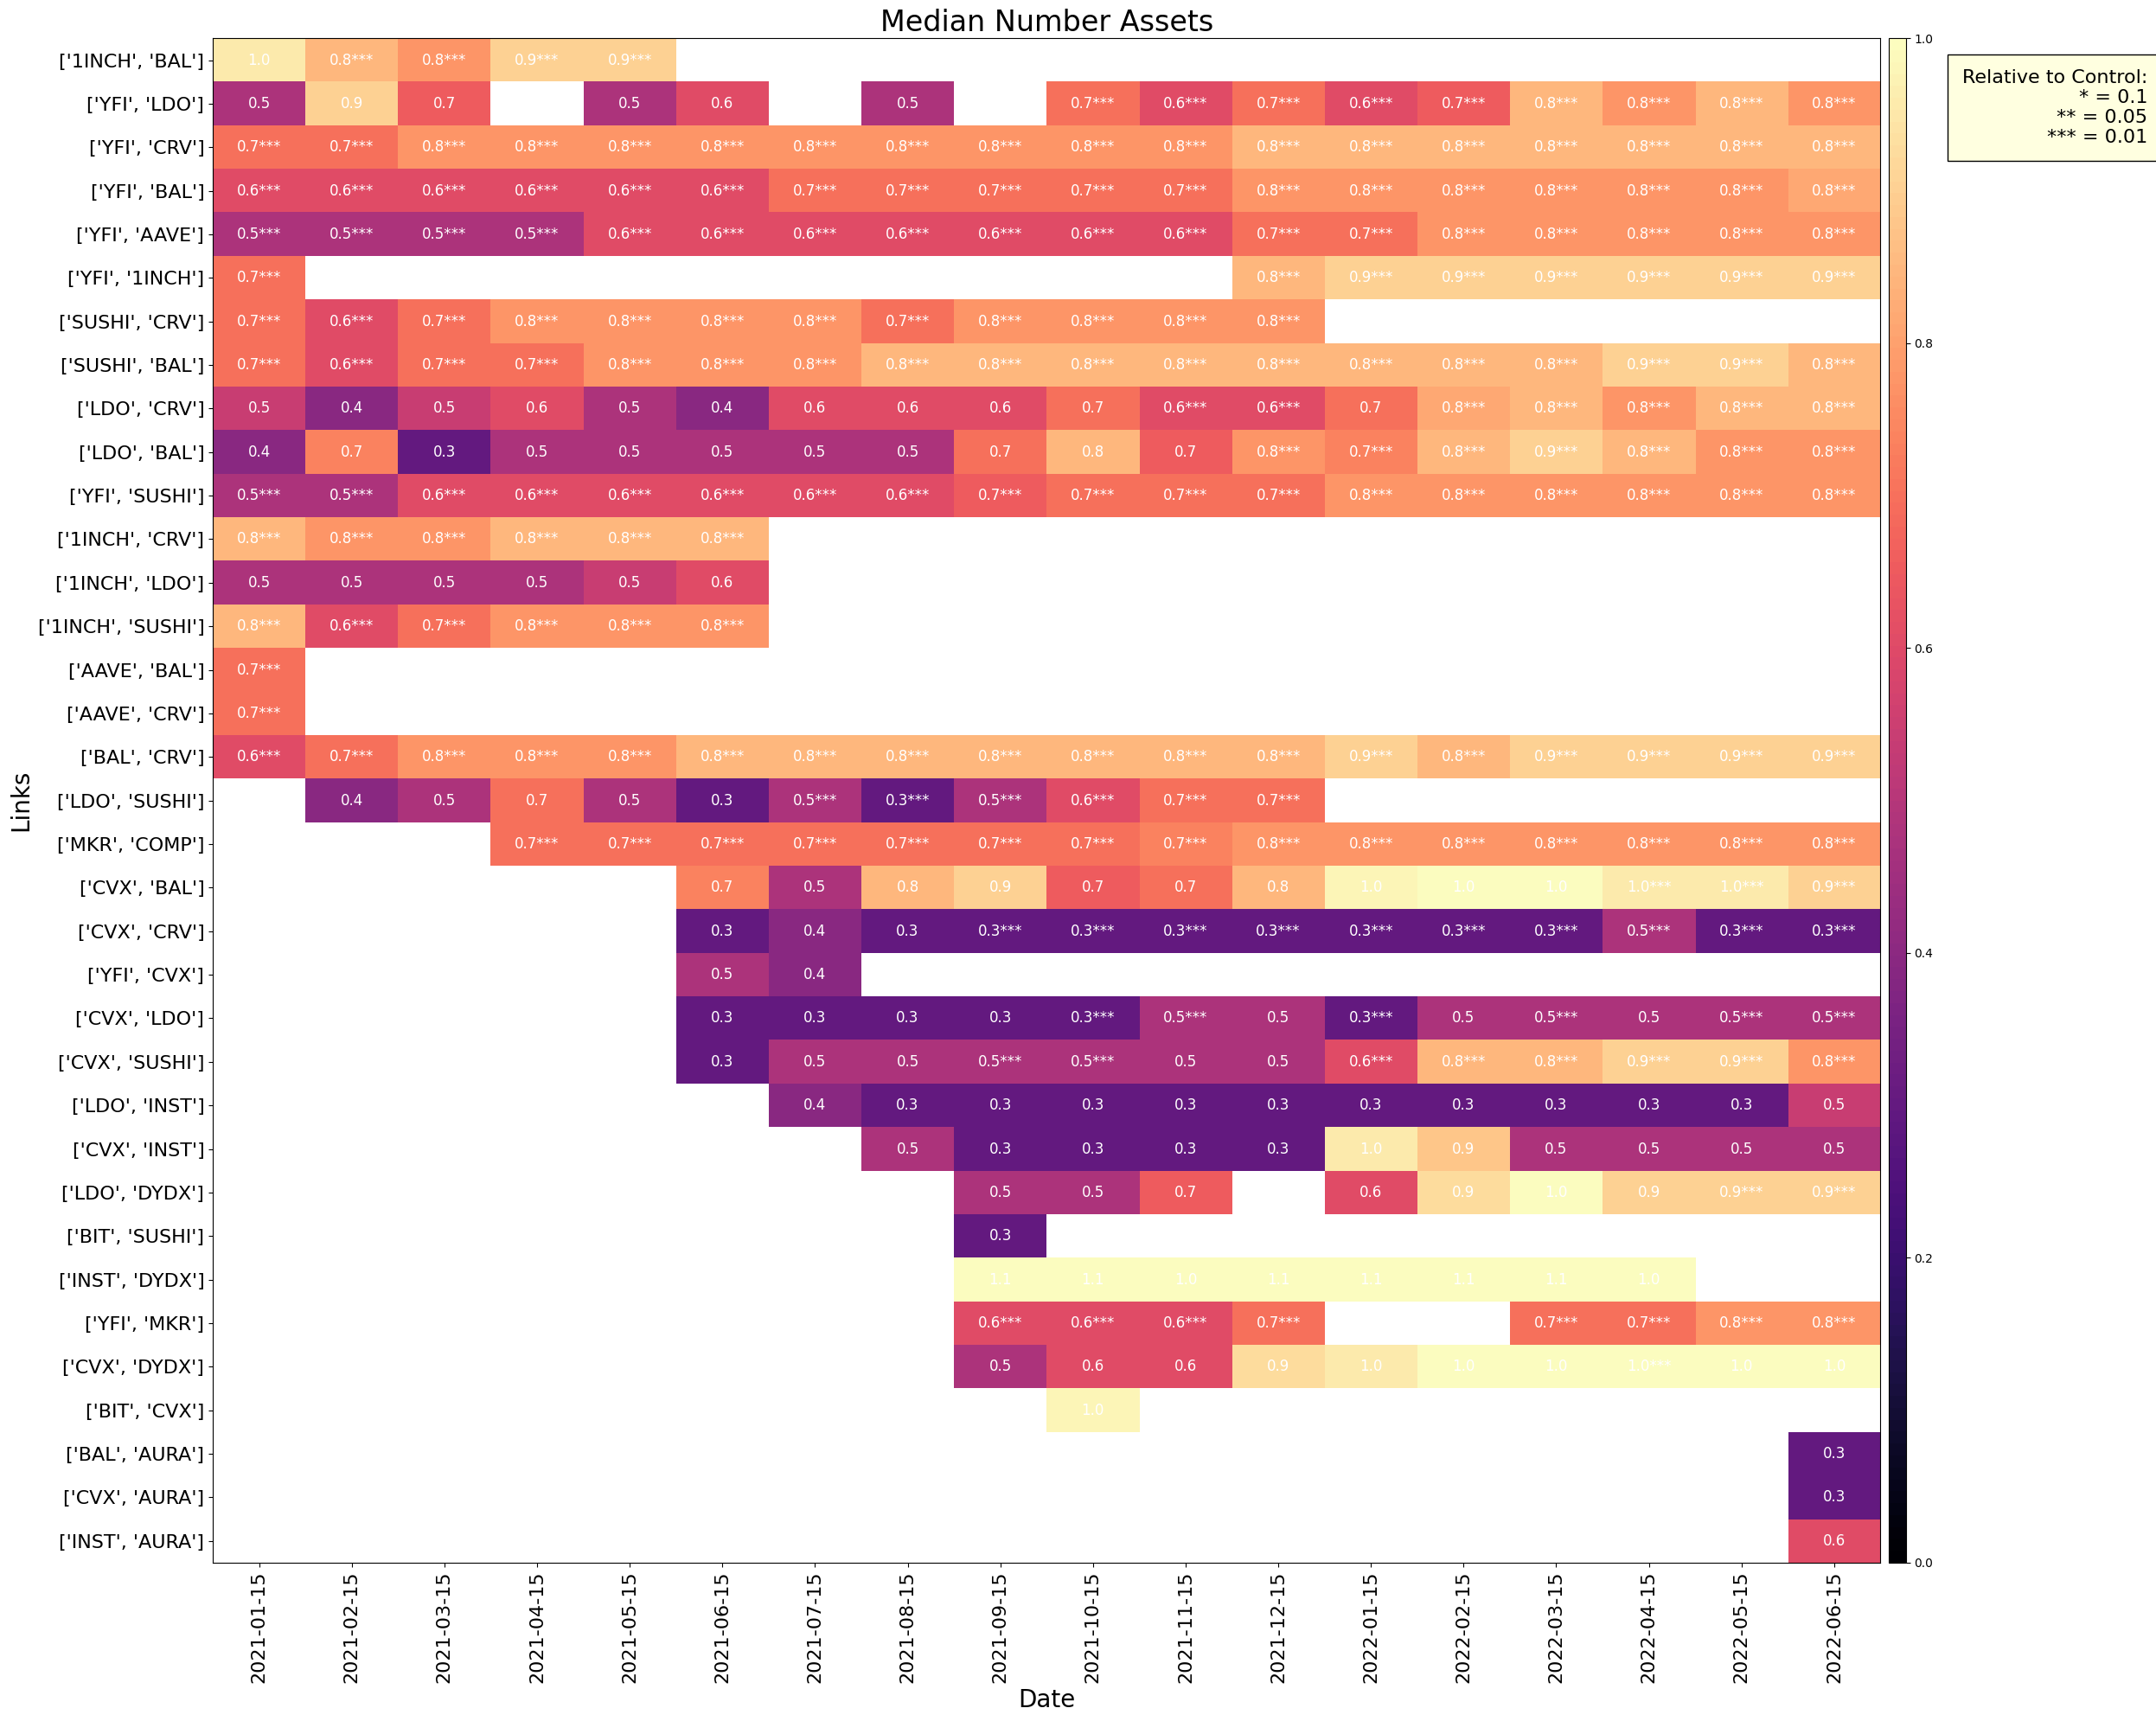

In [26]:
plot_heatmap_chart(metric_dataframes, metric_name='median_number_assets', pct=False, log=True, output_path="../output/links/", save=True, show=True)


# ISSUE: WHY DO WE HAVE LESS THAN 1 as MEDIAN

### Fig: Distribution of Labels

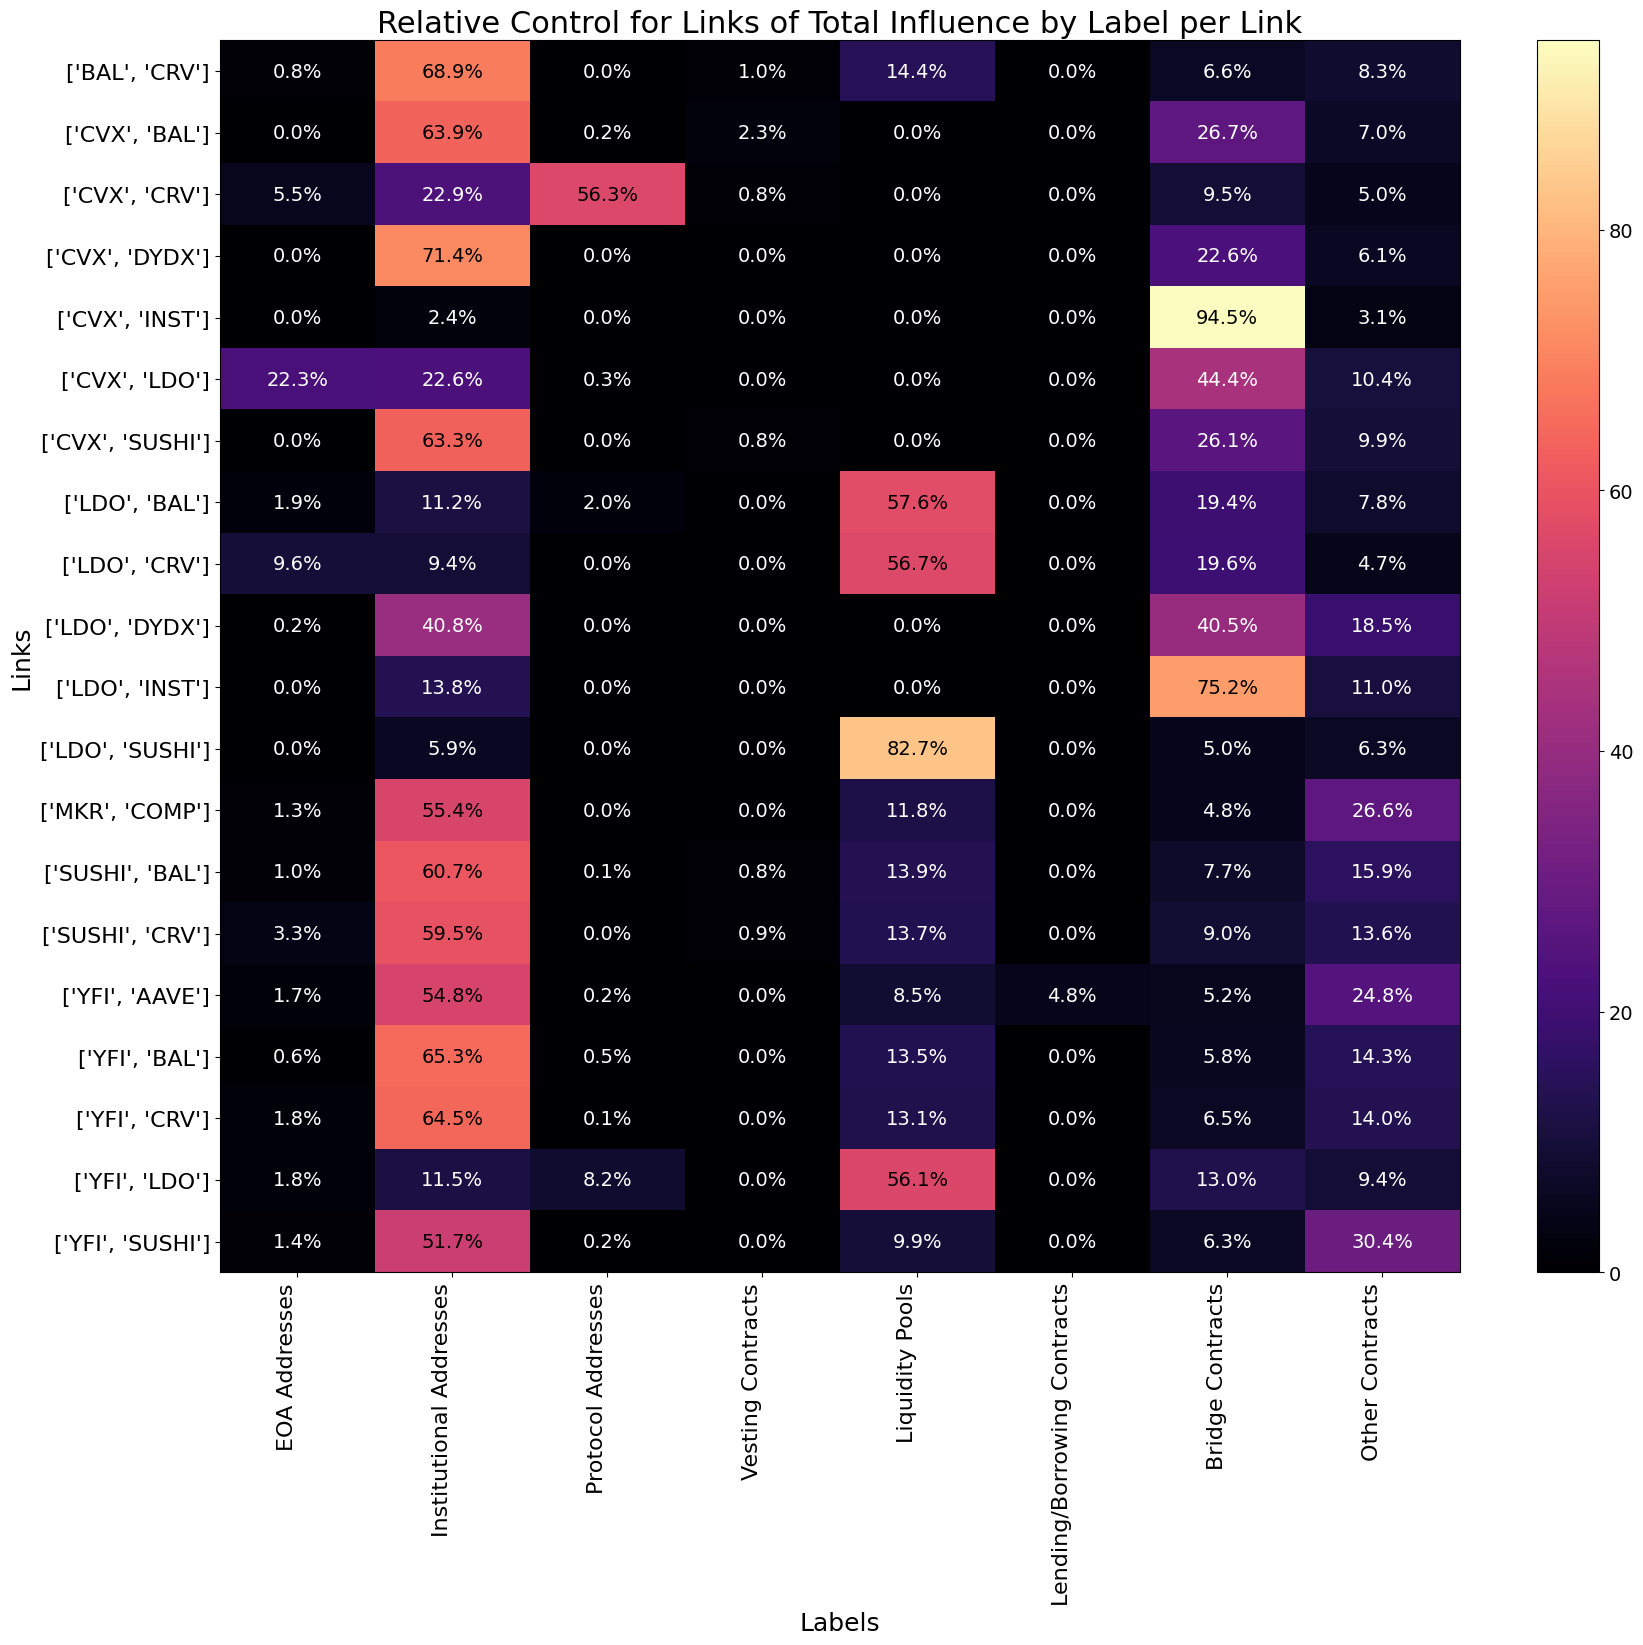

In [27]:
plot_heatmap_labels(metric_dataframes, group='sample', colormap='magma', output_path='../output/links', min_occurrences=9)

### Sensitivity Analysis 

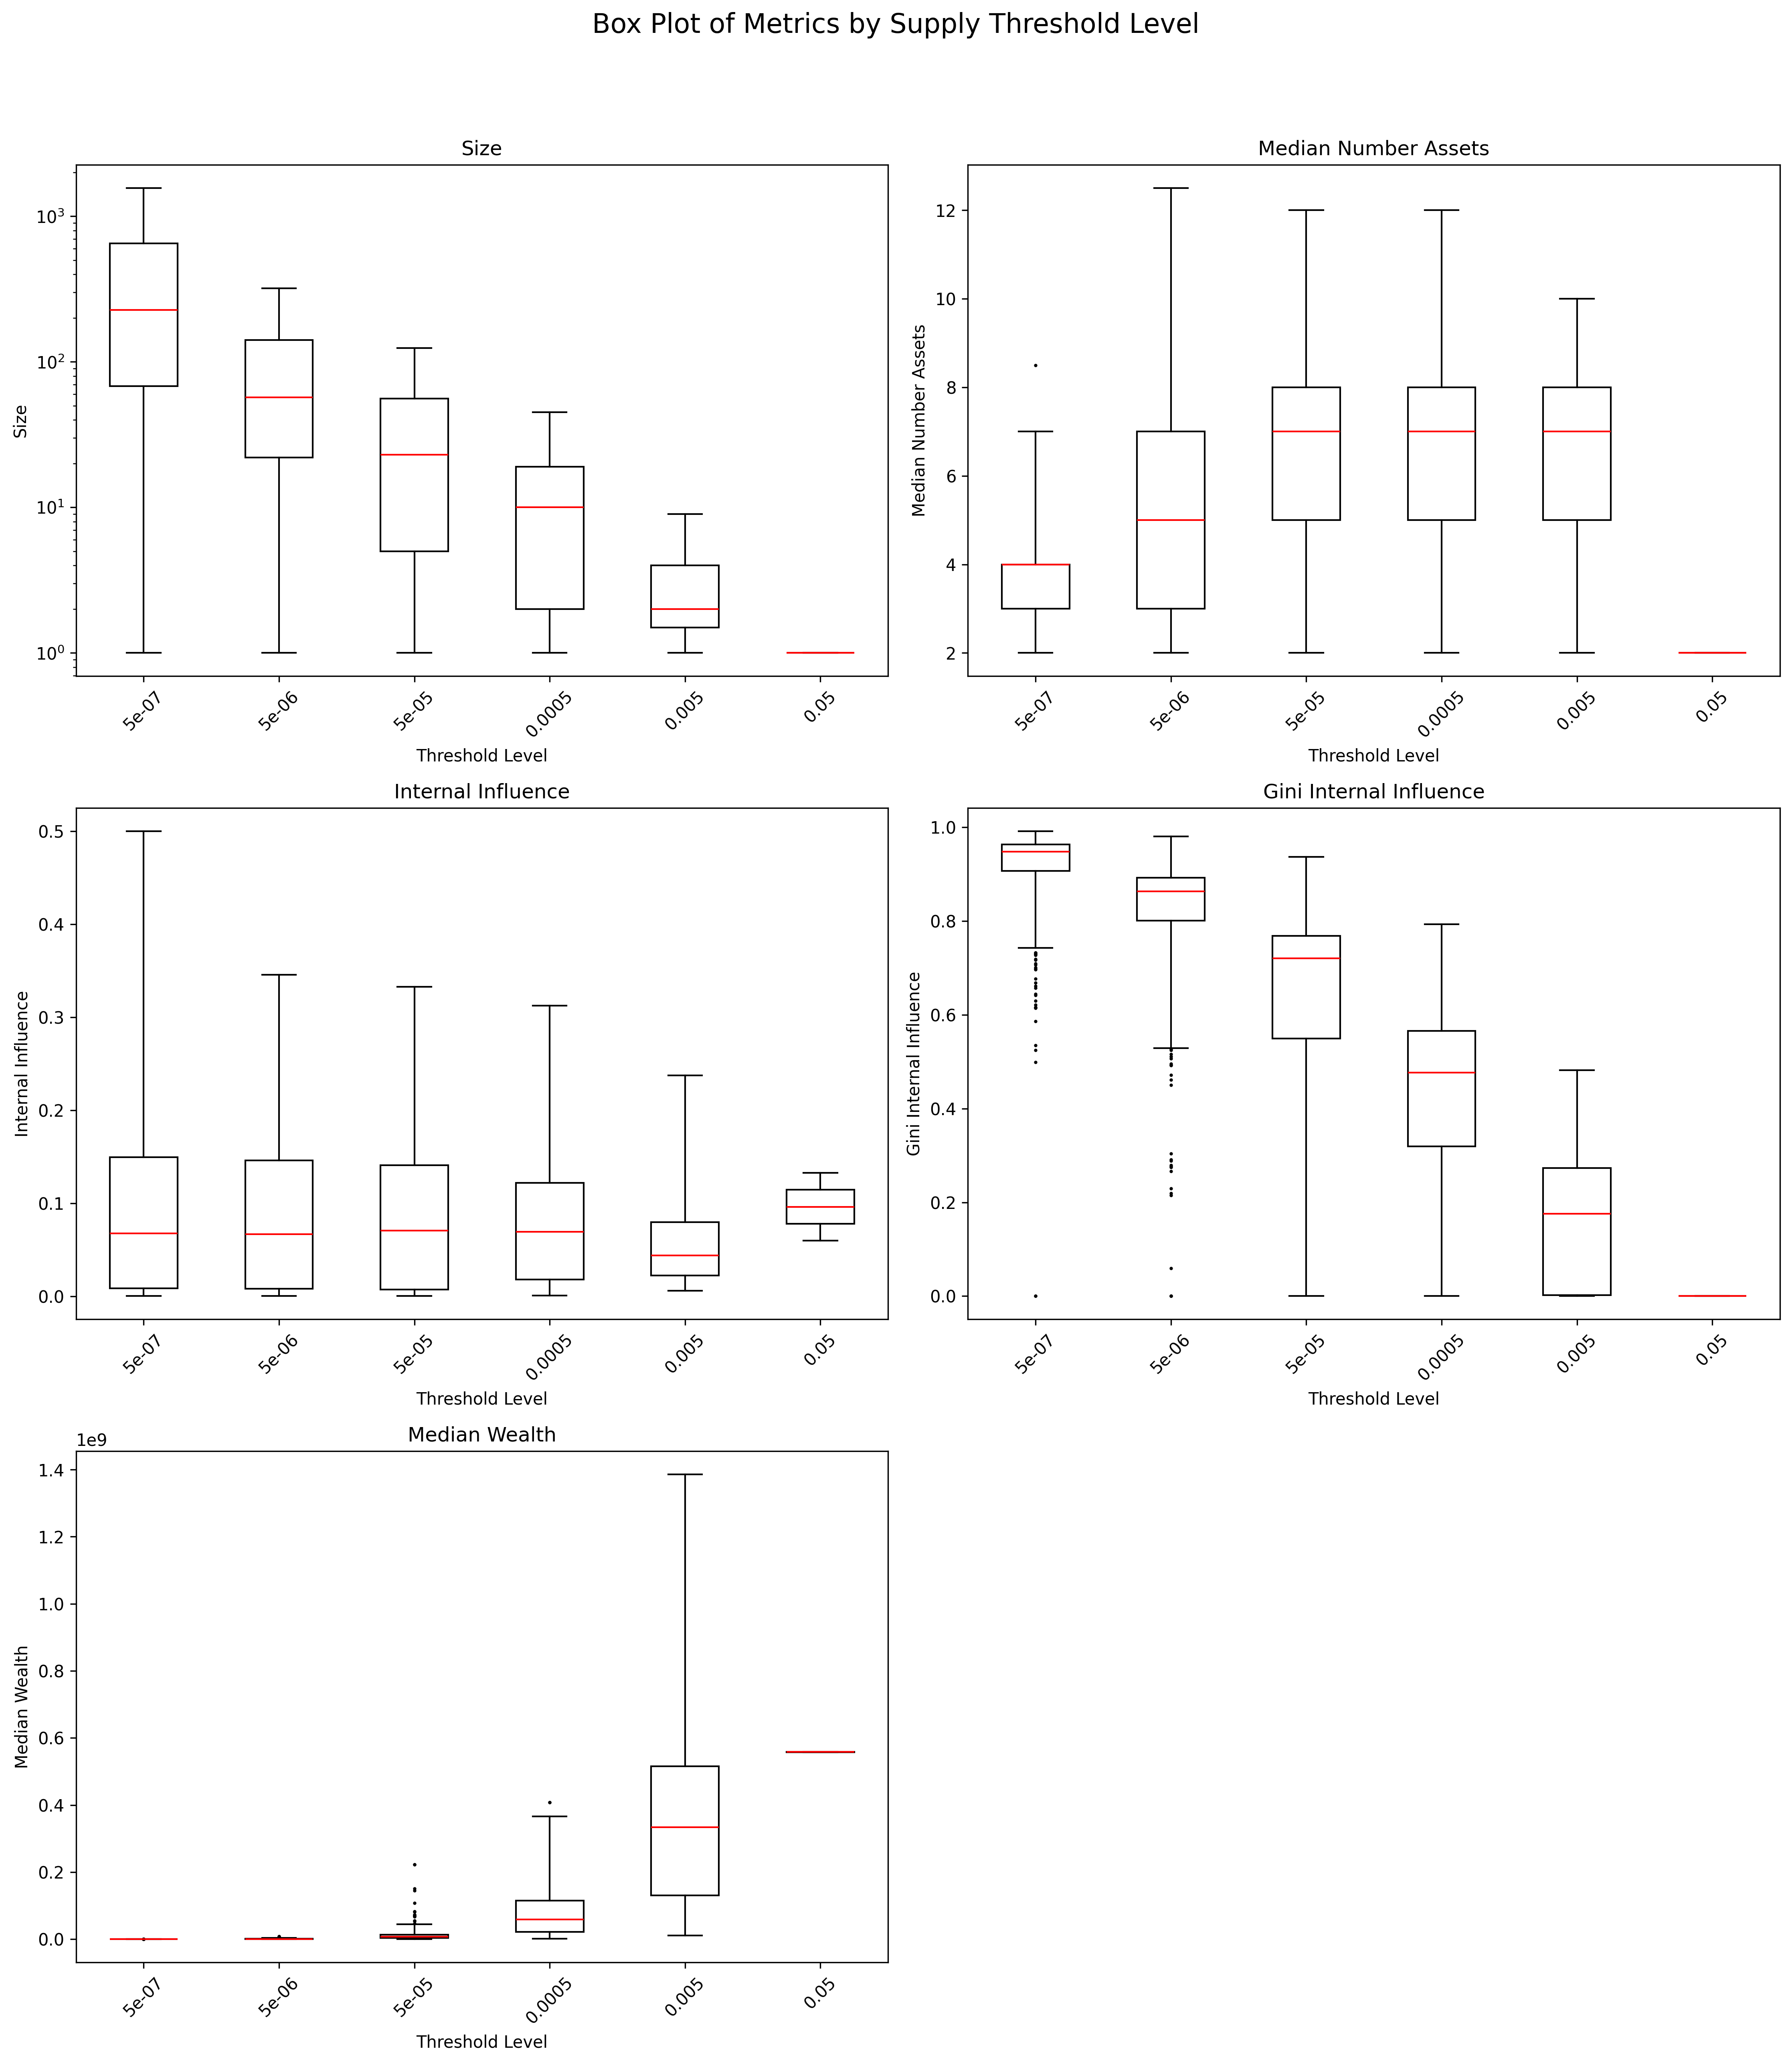

In [25]:
# Example usage
file_paths = [
    "../output/links/metrics/links_data_0.005.pkl",
    "../output/links/metrics/links_data_0.05.pkl",
    "../output/links/metrics/links_data_5e-05.pkl",
    "../output/links/metrics/links_data_5e-06.pkl",
    "../output/links/metrics/links_data_5e-07.pkl",
    "../output/links/metrics/links_data_0.0005.pkl"
]

# List of metrics to plot
chosen_metrics = ['size', 
           'median_number_assets', 
        #    'total_influence', 
        #    'gini_total_influence', 
           'internal_influence', 
           'gini_internal_influence', 
        #    'external_influence', 
        #    'gini_external_influence',  
        #    'median_influence', 
           'median_wealth', 
        #    'total_wealth', 
        #    'gini_total_wealth', 
        #    'internal_wealth', 
        #    'gini_internal_wealth', 
        #    'external_wealth', 
        #    'gini_external_wealth'
           ]

sensitivity_analysis(file_paths, chosen_metrics)


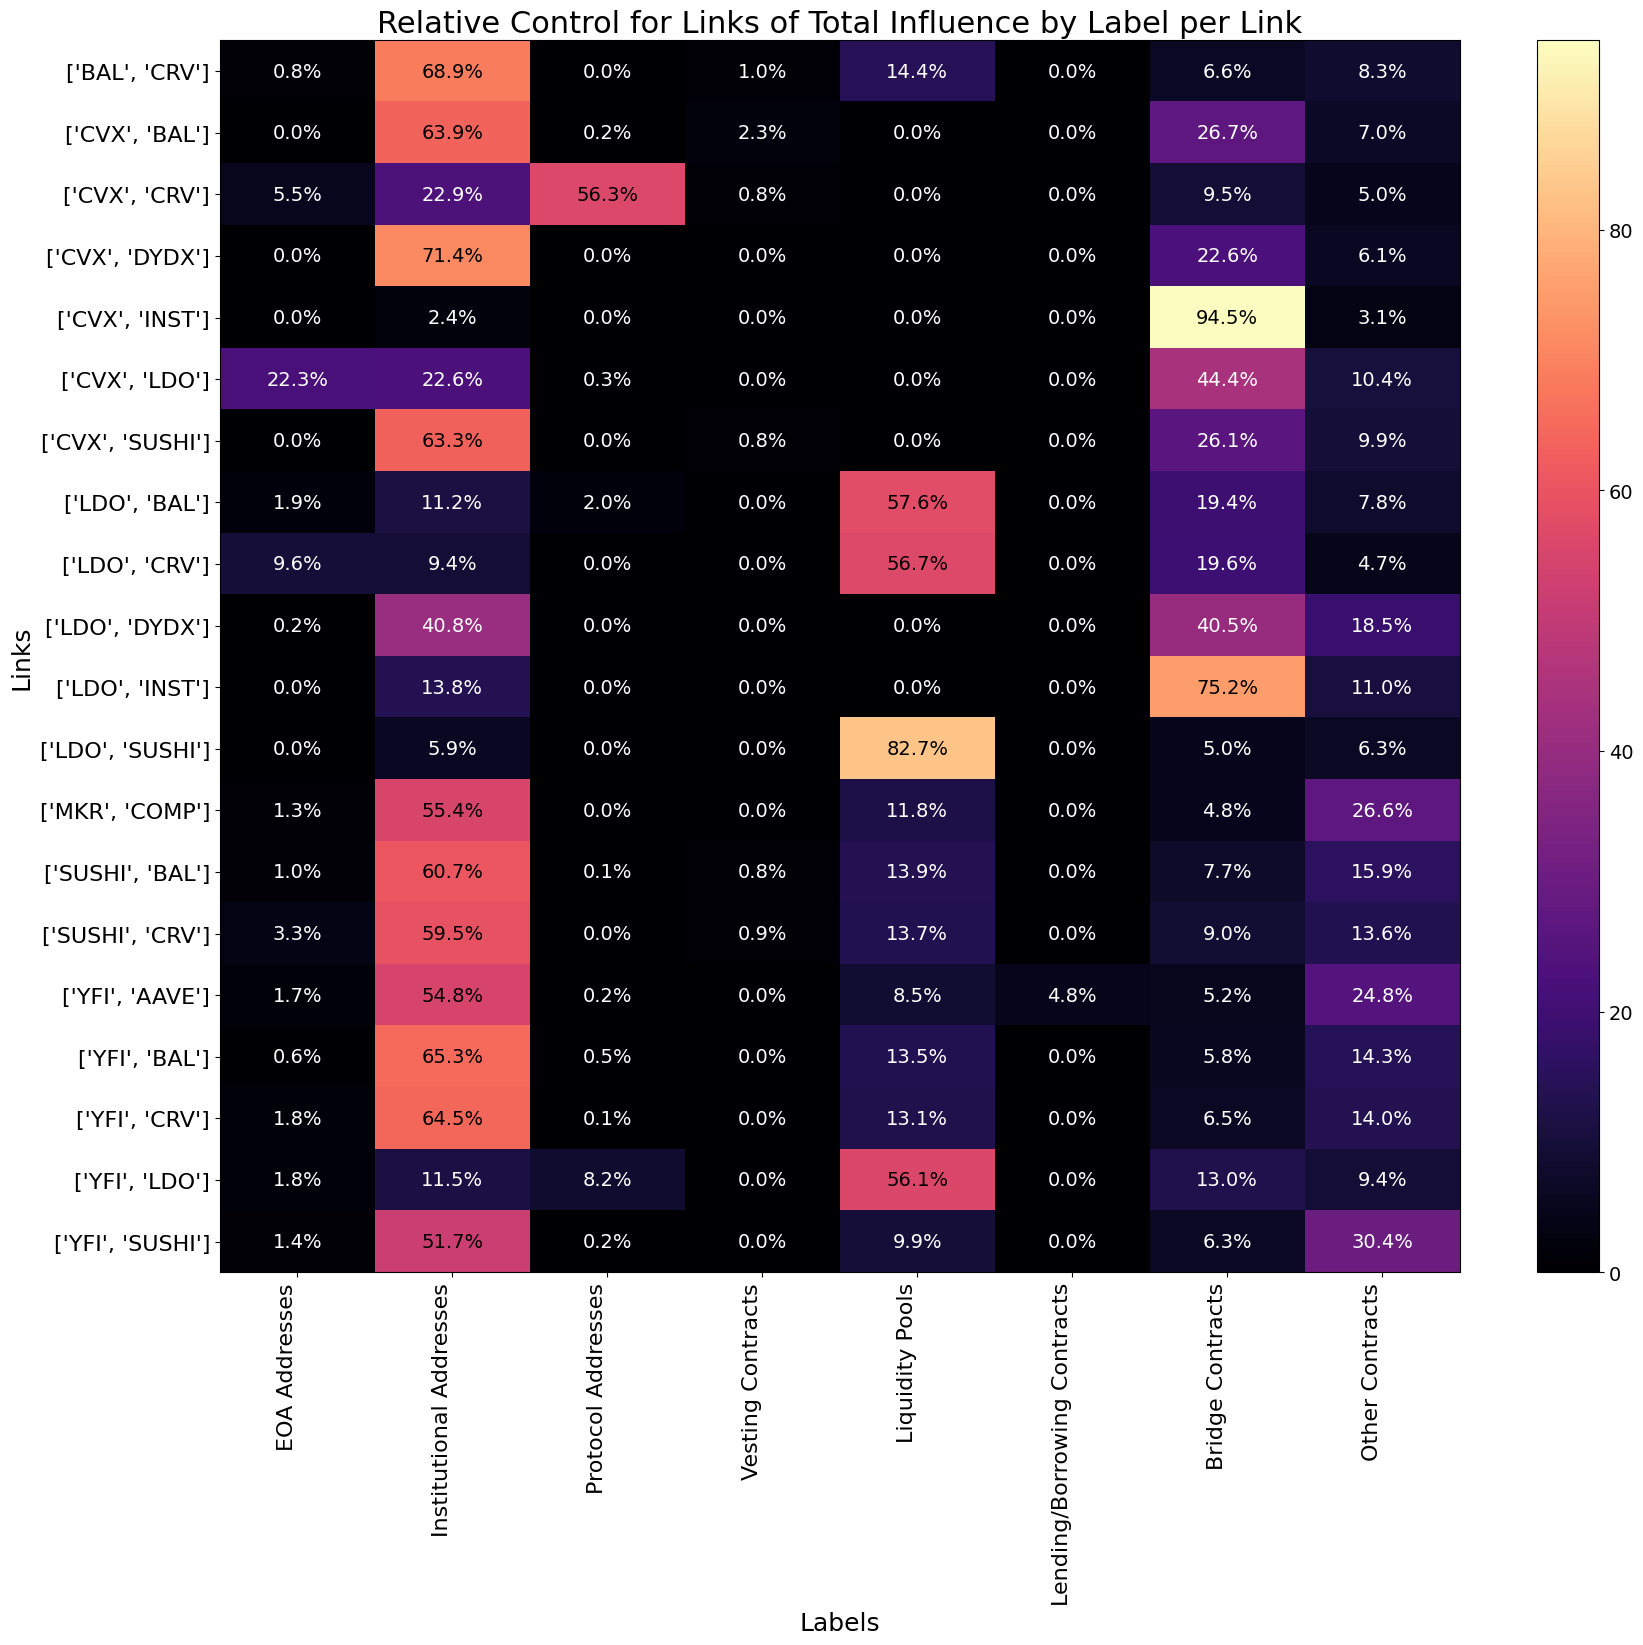

In [ ]:
plot_heatmap_labels(metric_dataframes, group='sample', colormap='magma', output_path='../output/links', min_occurrences=9)